#**TRABAJO FINAL DE MASTER - UPF BSM**

Elaborado por:


*   Carlos Santiago Martinez
*   Gustavo Parra
* Homero Szturm



## **Resumen Ejecutivo**

El presente trabajo tiene como finalidad desarrollar un modelo de aprendizaje automático orientado a la predicción de flujos migratorios internacionales. En un contexto global marcado por la creciente movilidad de personas, entender y anticipar los patrones migratorios se vuelve fundamental para la formulación de políticas públicas efectivas, la planificación territorial y la cooperación internacional.
El enfoque del proyecto combina conocimientos en ciencia de datos, aprendizaje automático y análisis social. Se partió de la integración de múltiples fuentes de datos internacionales que contienen información sobre movimientos migratorios y condiciones socioeconómicas de distintos países. A partir de esta información, se construyó una base de datos estructurada, estandarizada y enriquecida con indicadores clave, diferenciando entre países de origen y países de destino.
El proceso implicó tareas complejas de limpieza, transformación e imputación de datos, con el objetivo de obtener una base robusta que permitiera entrenar modelos predictivos. Se trabajó con variables que reflejan tanto las condiciones estructurales de los países como el volumen y tipo de migración observada, generando una estructura que permite modelar relaciones complejas y dinámicas.
Desde el punto de vista metodológico, se implementó un pipeline de procesamiento de datos y entrenamiento de modelos, asegurando la correcta validación temporal y la aplicabilidad práctica de los resultados. Se prestó especial atención al tratamiento de variables categóricas y a la preservación de la secuencia cronológica en los datos.
Este proyecto propone una herramienta analítica que, si bien basada en datos históricos, busca ofrecer una mirada prospectiva para la toma de decisiones informadas. En un entorno internacional cada vez más dinámico, el uso de modelos basados en datos y tecnología se vuelve una estrategia clave para anticipar desafíos y diseñar respuestas efectivas en materia de migración.


## **Objetivos**

Objetivo General:

El objetivo principal de este proyecto es el de implementar un modelo de aprendizaje automático capaz de predecir el flujo migratorio entre países. Con este modelo, lo que se busca es contribuir a la planificación y gestión de las políticas migratorias, ayudando así en la cooperación entre naciones y en la implementación de acuerdos en función a las proyecciones futuras.

Objetivos específicos:

*   Crear una base de datos con las características necesarias para poder generar resultados realistas y con utilidad para la toma de decisiones.
*   Identificar los principales indicadores socioeconómicos que influyen en los movimientos migratorios.
* Determinar el modelo de aprendizaje automático que mejor se adapte a los datos disponibles
* Evaluar el rendimiento del modelo mediante métricas adecuadas de validación.
* Poder generar inputs de calidad para poder utilizarlos a la hora de la toma de decisiones en este campo particular




#**0. Preparacion de entorno**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/TFM/Data

/content/drive/MyDrive/Colab_Notebooks/TFM/Data


In [ ]:
import pandas as pd
df = pd.read_excel("TFM_Database.xlsx")

#**1. Analisis Exploratorio**

In [ ]:
#df = df.copy()
#df.drop(['ref_año'], axis=1, inplace=True)

## **1.1. Valores Nulos**

In [ ]:
#Vemos los tipos de datos y si hay valores nulos
print(f'{df.info()} \n')
print(f"total null values per column \n", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77562 entries, 0 to 77561
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ref_año                   77562 non-null  object 
 1   pais_origen               77562 non-null  object 
 2   adquiere_nacionalidad     59667 non-null  float64
 3   busqueda_asilo            62548 non-null  float64
 4   migrantes_convencionales  58444 non-null  float64
 5   salida_de_migrantes       41172 non-null  float64
 6   migrantes_en_el_pais      53317 non-null  float64
 7   pais_destino              77562 non-null  object 
 8   año                       77562 non-null  int64  
 9   crecimiento_GDP           77562 non-null  float64
 10  crecimiento_GDP_2         72436 non-null  float64
 11  inflación                 77562 non-null  float64
 12  inflación_2               67928 non-null  float64
 13  indice_gini               67913 non-null  float64
 14  indice

Podemos ver que existen una gran variedad de lineas con valores vacios en varios campos, en particular con la data migratoria. Hay que explorar cuales pueden ser algunas razones por la que esto pasa

En el caso de los indicadores economicos, hay casos como del indice GINI el cual sabemos que puede ser complicado de conseguir por pais y no se realiza todos los anios. Lo mismo puede pasar con el HDI (Indice de desarrollo humano). En ese caso el tratamiento sera distinto

### **1.1.1 Tratamiento de valores nulos (variables de migrates)**

Para poder trabajar con cantidades y sin nulos vamos a basar mucho de los analisis en el total general. Pero la informacion de las otras columnas nos va a permitir entender mas en detalle que tipo de migraciones son las que se estan efectuando realmente.
El hecho de que tengan valores nulos es lago logico, ya que, no necesariamnete hay flujos de todos los tipos de inmigrantes en cada pais cada año


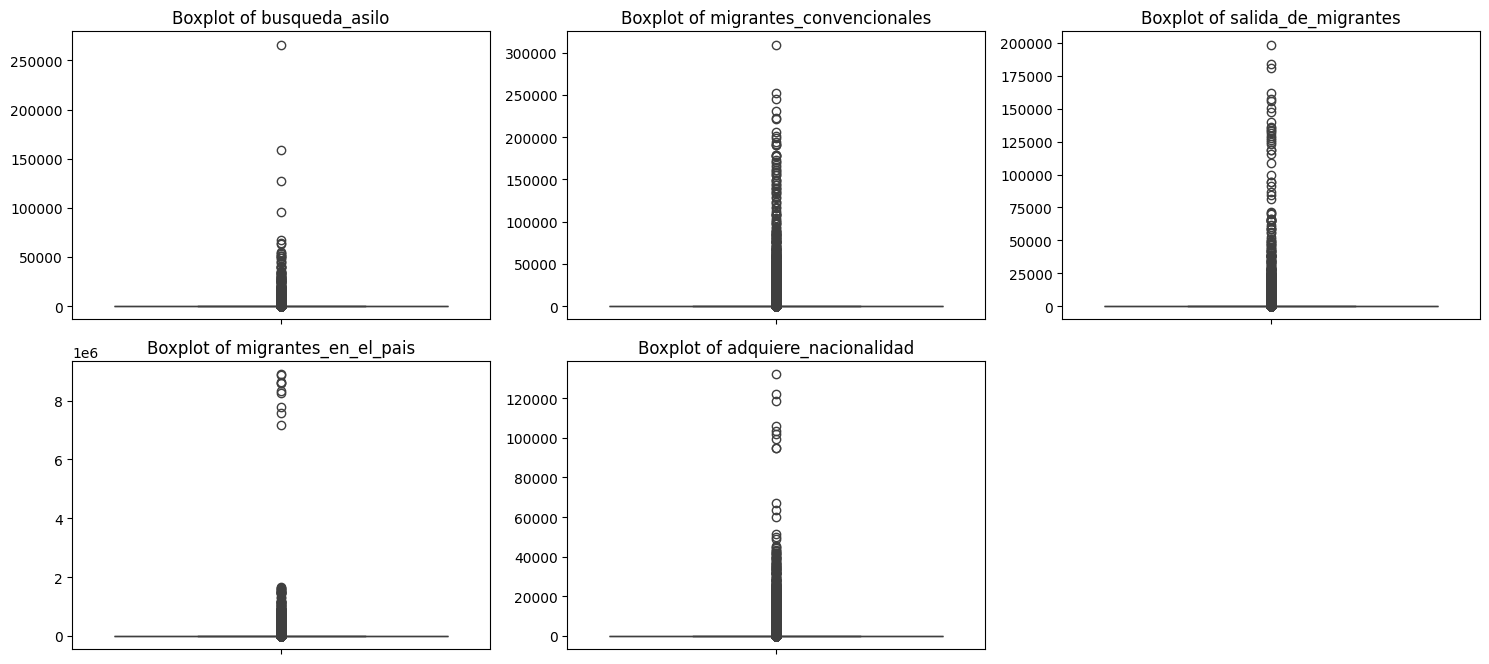

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionamos las columnas de variables migratorias
migratory_cols = ['busqueda_asilo', 'migrantes_convencionales', 'salida_de_migrantes',
                  'migrantes_en_el_pais', 'adquiere_nacionalidad']

# Crear boxplots para cada variable migratoria
plt.figure(figsize=(15, 10))
for i, col in enumerate(migratory_cols):
    plt.subplot(3, 3, i + 1)  # 3x3 grid
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel('')

plt.tight_layout()
plt.show()


En todas las variables analizadas, la mayoría de los valores se concentran en rangos bajos, mientras que unos pocos casos extremos elevan significativamente los máximos observados.

Esto sugiere una marcada desigualdad entre países en cuanto a población migrante, solicitudes de asilo, adquisición de nacionalidad, entre otros indicadores.

En este caso particular, consideramos que los datos reflejan fielmente la realidad. Por lo tanto, no se aplicarán transformaciones ni filtrados sobre los valores atípicos, ya que representan fenómenos relevantes que deben conservarse en el análisis.

### **1.1.2. Decision final sobre migrantes**
El hecho de tener un dataset con detalles de los migrantes y con altos valores de dispercion nos llevo a tomar 2 decisiones fundamentales.
1. Vamos trabajar solo sobre aquellas columnas que implican flujos reales de migrantes, siendo esta la salida de migrantes y entrada de los mismo. Asumiendo que necesariamente tiene que haber un migrante para salir por ende en caso de que la salida sea mayor que la entrada este total tiene que ser 0. Ya que no necesariamente debe existir una registro de una persona ya dentro del pais de destino.
2. Vamos a tomar este valor generado por la suma de busqueda_asilo y migrantes_convencionales y le restaremos aquellos que salen del pais, este va a ser el total general

In [ ]:
# Crear la columna con valores válidos, tratando los NaN como ceros
df['total_general'] = (
    df['busqueda_asilo'].fillna(0) +
    df['migrantes_convencionales'].fillna(0) -
    df['salida_de_migrantes'].fillna(0)
)

# Reordenar columnas para poner 'total_general' al principio
cols = ['total_general'] + [col for col in df.columns if col != 'total_general']
df = df[cols]


In [ ]:
#Vemos los tipos de datos y si hay valores nulos
print(f'{df.info()} \n')
print(f"total null values per column \n", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77562 entries, 0 to 77561
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   total_general             77562 non-null  float64
 1   ref_año                   77562 non-null  object 
 2   pais_origen               77562 non-null  object 
 3   adquiere_nacionalidad     59667 non-null  float64
 4   busqueda_asilo            62548 non-null  float64
 5   migrantes_convencionales  58444 non-null  float64
 6   salida_de_migrantes       41172 non-null  float64
 7   migrantes_en_el_pais      53317 non-null  float64
 8   pais_destino              77562 non-null  object 
 9   año                       77562 non-null  int64  
 10  crecimiento_GDP           77562 non-null  float64
 11  crecimiento_GDP_2         72436 non-null  float64
 12  inflación                 77562 non-null  float64
 13  inflación_2               67928 non-null  float64
 14  indice

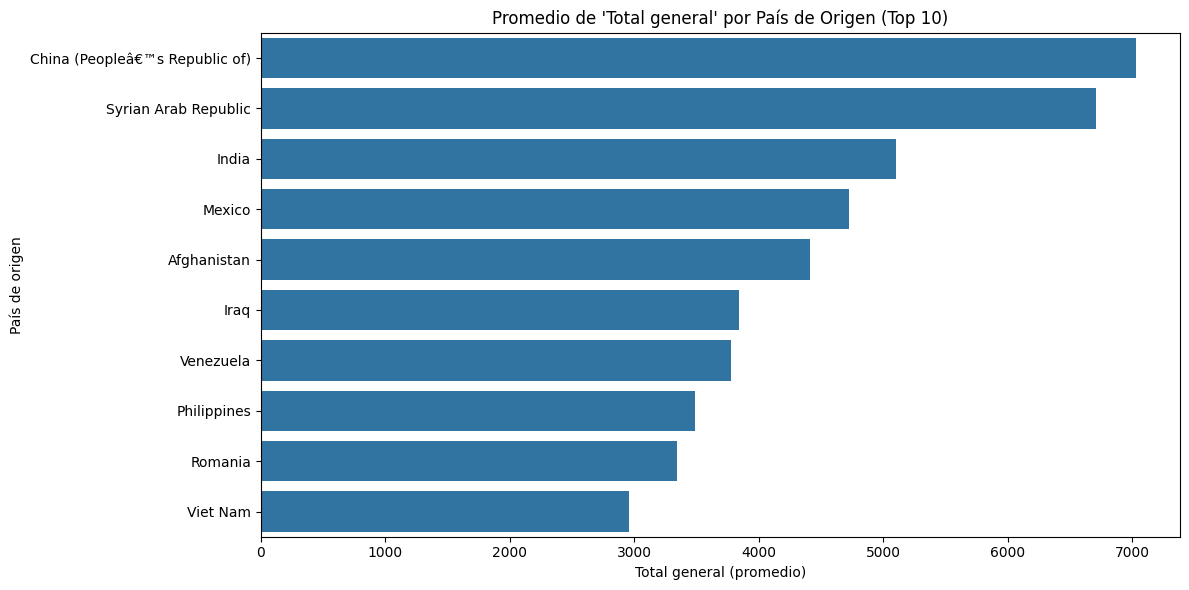

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular el promedio de 'Total general' por país de origen
df_grouped = df.groupby('pais_origen')['total_general'].mean().sort_values(ascending=False).head(10)  # top 10

# Crear gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=df_grouped.values, y=df_grouped.index)

plt.title("Promedio de 'Total general' por País de Origen (Top 10)")
plt.xlabel("Total general (promedio)")
plt.ylabel("País de origen")

plt.tight_layout()
plt.show()


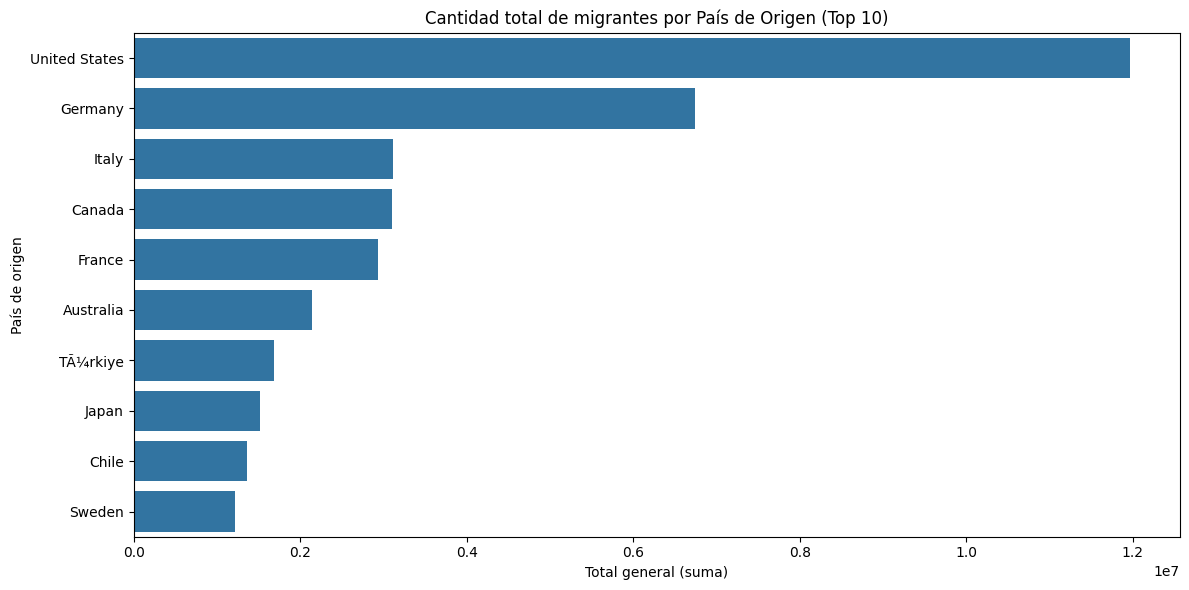

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Agrupar y sumar los valores de "Total general" por país de origen
df_total = df.groupby('pais_destino')['total_general'].sum().sort_values(ascending=False).head(10)  # top 10 países

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=df_total.values, y=df_total.index)

plt.title("Cantidad total de migrantes por País de Origen (Top 10)")
plt.xlabel("Total general (suma)")
plt.ylabel("País de origen")

plt.tight_layout()
plt.show()


### **1.1.2 Tratamiento de valores nulos (variables macroeconomicas)**

El analisis exploratorio, transformacion y preprocesamiento de los datos se realizo en el anexo titulado **"Analisis exploratorio y preprocesamiento de variables macroeconomicas**.

A continuacion mostraremos a grandes razgos el proceso que realizamos para el tratamiento de valores nulos, outliers y transformaciones de estas variables

#### **1.1.2.1 Creacion de subset de varianles macroeconomicas**

In [ ]:
# Creamos un subset con datos identificativos como los paises, año y id de columna y las variables macroeconomicas
df_indicators = pd.concat([df[['ref_año','pais_origen', 'pais_destino','año']], df.iloc[:, 10:]], axis=1) # Las columnas 10 en adelante contienen los indicadores macro

In [ ]:
# Mostramos en pantalla las primeras filas para asegurarnos que se creo correctamente el subset
df_indicators.head()

,ref_año,pais_origen,pais_destino,año,crecimiento_GDP,crecimiento_GDP_2,inflación,inflación_2,indice_gini,indice_gini_2,hdi,hdi_2,desempleo,desempleo_2,expectativa_de_vida,expectativa_de_vida_2
0,DEU2015SYR2015,Syrian Arab Republic,Germany,2015,2.169499,-10.310340,0.906794,10.927114,30.8,NaN,0.942,0.544,4.981,8.581,81.090244,65.492
1,DEU2016SYR2016,Syrian Arab Republic,Germany,2016,1.652720,-4.179792,0.514426,38.461143,31.7,NaN,0.941,0.552,4.624,8.531,80.641463,63.265
2,COL2019VEN2019,Venezuela,Colombia,2019,2.564324,NaN,3.240569,NaN,50.4,NaN,0.766,0.738,9.111,7.217,76.579000,72.641
3,COL2018VEN2018,Venezuela,Colombia,2018,1.359361,NaN,4.314313,NaN,49.7,NaN,0.765,0.750,8.872,7.302,76.418000,71.903
4,USA2016MEX2016,Mexico,United States,2016,2.945550,2.702323,0.118627,2.720641,41.2,NaN,0.924,0.769,5.280,4.313,78.690244,74.431


#### **1.1.2.3. Eliminacion de paises sin data macroeconomica**

El primer paso que consideramos correcto para limpiar la base de datos de manera eficiente, es eliminar los paises que no tengan data disponible, ya que no tienen mucha utilidad para nuestro modelo

En este caso podemos ver que los problemas vienen principalmente de los paises de origen (indicadores con el numero '2')

In [ ]:
#creamos una lista de los paises sin datos, para posteriormente eliminarlos del df

no_data_countries = [] #lista vacia donde estaran dichos paises

#agrupamos la data por paises y tomamos GDP, un indicador anual.
grouped_countries = df_indicators.groupby('pais_origen')['crecimiento_GDP_2'] # consideramos que si todos son nulos, el resto de indicadores tambien

# creamos un loop que compare el total de valores nulos de 'GDP' con el total de filas
for country, series in grouped_countries:
    # Si el numero coincide entra a la lista y concluimos que no hay data asociada a dicho pais
    if series.isna().sum() == len(series):
        no_data_countries.append(country)

In [ ]:
#Mostramos en pantalla la lista de paises sin data para poder analizarlos
print(f'paises sin data disponible: \n')

for c in no_data_countries:
  print(c)

paises sin data disponible: 

Anguilla
British Virgin Islands
Caribbean
Chinese Taipei
Cook Islands
Democratic Peopleâ€™s Republic of Korea
EEA
European Union (15 countries)
Falkland Islands (Malvinas)
Former Czechoslovakia
Former Netherlands Antilles
Former Serbia and Montenegro
Former USSR
Former Yugoslavia
French Guiana
Gibraltar
Guadeloupe
Holy See
Kosovo
Martinique
Mayotte
Montserrat
New Caledonia
Niue
Norfolk Island
Pitcairn
RÃ©union
Saint Helena
Saint Pierre and Miquelon
Svalbard and Jan Mayen
Tokelau
Wallis and Futuna


Estos son los paises que tenemos que eliminar de la lista ya que no tienen data macroeconomica asociada a ellos en las bases de datos de la OECD, ONU ni World Bank. Esto puede ser por diferentes razones:


*   Pais no reconocido internacionalmente (no tiene codigo pais que coincida con las bases de datos)
*   No es un pais: Se puede ver en los caasos como World, European Union, Caribbean, etc...
* Paises con poca trasnparencia o acceso de datos (i.e.: Korea del norte)

En muchos de estos casos, no hay poblaciones muy grandes y por ende, son paises con poco flujos migratorios, por lo que no creemos que afecten gravemente el modelo


In [ ]:
# Eliminamos los registos sin data macroeconomica
df_indicators = df_indicators[~df_indicators['pais_origen'].isin(no_data_countries)]

In [ ]:
# Mostramos en pantalla la metadata del df para ver el impacto
df_indicators.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73511 entries, 0 to 77561
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ref_año                73511 non-null  object 
 1   pais_origen            73511 non-null  object 
 2   pais_destino           73511 non-null  object 
 3   año                    73511 non-null  int64  
 4   crecimiento_GDP        73511 non-null  float64
 5   crecimiento_GDP_2      72436 non-null  float64
 6   inflación              73511 non-null  float64
 7   inflación_2            67796 non-null  float64
 8   indice_gini            64350 non-null  float64
 9   indice_gini_2          30194 non-null  float64
 10  hdi                    73511 non-null  float64
 11  hdi_2                  71186 non-null  float64
 12  desempleo              73511 non-null  float64
 13  desempleo_2            67236 non-null  float64
 14  expectativa_de_vida    73511 non-null  float64
 15  expecta

Al eliminar estos registros quedan 73,511 filas, lo que consideramos que es una cantidad apropiada para el modelo

#### **1.1.2.4 Datos nulos por crecimeinto de GDP**

Analizamos solo el GDP de paises de origen, ya que para los paises destino no hay datos nulos

In [ ]:
# Calculamos la cantitdad de valores nulos por Indice GINI de pais orign
gdp_nulls = df_indicators['crecimiento_GDP_2'].isna().sum()

# mostramos en pantalla el porcentaje de valores nulos con respecto al todo el df
print(f"""
Cantidad de valores nulo para gdp de pais origen: {gdp_nulls}
Porcentaje de nulos sobre el total de registros: {round(gdp_nulls/len(df_indicators),3)*100} %
""")


Cantidad de valores nulo para gdp de pais origen: 1075
Porcentaje de nulos sobre el total de registros: 1.5 %



#### **1.1.2.5. Datos nulos por inflacion**

Viendo la cantidad de valores nulos de inflacion vs los de cecimeinto de PIB, tenemos la hipotesis de que para varios paises no se encontraron datos de inflacion. Para comprobar esto Haremos un loop que nos ayude a identificar si esto ocurre

In [ ]:
countries_all_nulls = []

# Group by country
grouped = df_indicators.groupby('pais_origen')

for country, group in grouped:
    total_rows = len(group)
    nulls = group['inflación_2'].isna().sum()

    if nulls == total_rows and total_rows > 0:
        countries_all_nulls.append(country)

print(f"paises sin data de inflacion:\n")
for c in countries_all_nulls:
  print(c)

paises sin data de inflacion:

American Samoa
Andorra
Argentina
Bermuda
Cuba
Eritrea
Faroe Islands
French Polynesia
Greenland
Guam
Liechtenstein
Marshall Islands
Monaco
Northern Mariana Islands
Puerto Rico
Somalia
Turkmenistan
Turks and Caicos Islands
United States Virgin Islands


In [ ]:
# Calculamos la cantitdad de valores nulos por Indice inflacion de pais orign
inf_nulls = df_indicators['inflación_2'].isna().sum()

# mostramos en pantalla el porcentaje de valores nulos con respecto al todo el df
print(f"""
Cantidad de valores nulo para inflacion de pais origen: {inf_nulls}
Porcentaje de nulos sobre el total de registros: {round(inf_nulls/len(df_indicators),2)*100} %
""")


Cantidad de valores nulo para inflacion de pais origen: 5715
Porcentaje de nulos sobre el total de registros: 8.0 %



Dado que hay mucha data faltante de ambos indicadores (para paises origen), y de paises clave como Argentina, se decidio buscar data complementaria de el Fondo Monetario Internacional (IMF) para completar los nulos.

Esta manera nos aseguramos que toda la data disponible esta reflejada. Hay paises que posiblemente no tengan data macroeconomica por diferentes razones.

#### **1.1.2.6. Merge con tabla complementaria de data macroeconomica**

In [ ]:
%cd /content/drive/MyDrive/TFM/Data/supplemental_data

/content/drive/MyDrive/Colab_Notebooks/TFM/Data/supplemental_data


In [ ]:
import pandas as pd
df_external = pd.read_excel("IMF__supplemental_data_2.xls") # Dataset propietario que contiene data de inflacion, crecimiento de GDP y desempleo (data de IMF)

In [ ]:
#vemos las primeras 5 filas
df_external.head()

,Indicator code,Contry code,pais_origen,año,inflación_2,crecimiento_GDP_2,desempleo_2
0,AFG1980,AFG,Afghanistan,1980,no data,no data,NaN
1,AFG1981,AFG,Afghanistan,1981,no data,no data,NaN
2,AFG1982,AFG,Afghanistan,1982,no data,no data,NaN
3,AFG1983,AFG,Afghanistan,1983,no data,no data,NaN
4,AFG1984,AFG,Afghanistan,1984,no data,no data,NaN


In [ ]:
import numpy as np

# Remplazamos todas las instancias de 'no data' por NaN
df_external.replace('no data', np.nan, inplace=True)

/tmp/ipython-input-23-4249432755.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_external.replace('no data', np.nan, inplace=True)


In [ ]:
#Hacemos una copia donde le agregamos 1 año a los indicadores de esta data set externo
#Esto es para ser consistentes con el df original y usar datos del año anterior como indicadores (lagging indicator)
df_external_2 = df_external.copy()
df_external_2['año'] = df_external_2['año'] + 1

In [ ]:
# Actualizamos el id de pais + año para que coincida con el df otiginal
df_external_2['Indicator code'] = df_external_2['Contry code'].astype(str) + df_external_2['año'].astype(str)

In [ ]:
df_external_2.head()

,Indicator code,Contry code,pais_origen,año,inflación_2,crecimiento_GDP_2,desempleo_2
0,AFG1981,AFG,Afghanistan,1981,NaN,NaN,NaN
1,AFG1982,AFG,Afghanistan,1982,NaN,NaN,NaN
2,AFG1983,AFG,Afghanistan,1983,NaN,NaN,NaN
3,AFG1984,AFG,Afghanistan,1984,NaN,NaN,NaN
4,AFG1985,AFG,Afghanistan,1985,NaN,NaN,NaN


In [ ]:
#creamos un id para los paises origen en el df original para poder hacer el join con la base de datos complementaria
df_indicators['Indicator code'] = df_indicators['ref_año'].astype(str).str[-7:] #los ultimos 7 caracteres corresponden al pais origen y año, el mismo formato del df complementario

/tmp/ipython-input-27-665766503.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_indicators['Indicator code'] = df_indicators['ref_año'].astype(str).str[-7:] #los ultimos 7 caracteres corresponden al pais origen y año, el mismo formato del df complementario


In [ ]:
# Creamos un nuevo data set haciendo un merge del df original y el da la data complementaria del IMF
df_merged = df_indicators.merge(
    df_external_2,
    on='Indicator code',
    how='left',
    suffixes=('', '_ext')
)

In [ ]:
#identificamos las columnas que queremos rellenar
cols_to_fill = ['inflación_2', 'crecimiento_GDP_2', 'desempleo_2']

#Hacemos un loop para rellenar los NaNs de ambas columnas con la data complementaria
for col in cols_to_fill:
    df_merged[col] = df_merged[col].fillna(df_merged[f"{col}_ext"])

In [ ]:
df_merged.head(10)

,ref_año,pais_origen,pais_destino,año,crecimiento_GDP,crecimiento_GDP_2,inflación,inflación_2,indice_gini,indice_gini_2,...,desempleo_2,expectativa_de_vida,expectativa_de_vida_2,Indicator code,Contry code,pais_origen_ext,año_ext,inflación_2_ext,crecimiento_GDP_2_ext,desempleo_2_ext
0,DEU2015SYR2015,Syrian Arab Republic,Germany,2015,2.169499,-10.310340,0.906794,10.927114,30.8,NaN,...,8.581,81.090244,65.492,SYR2015,SYR,Syria,2015.0,NaN,NaN,NaN
1,DEU2016SYR2016,Syrian Arab Republic,Germany,2016,1.652720,-4.179792,0.514426,38.461143,31.7,NaN,...,8.531,80.641463,63.265,SYR2016,SYR,Syria,2016.0,NaN,NaN,NaN
2,COL2019VEN2019,Venezuela,Colombia,2019,2.564324,-19.700000,3.240569,130060.200000,50.4,NaN,...,7.217,76.579000,72.641,VEN2019,VEN,Venezuela,2019.0,130060.2,-19.7,35.6
3,COL2018VEN2018,Venezuela,Colombia,2018,1.359361,-15.700000,4.314313,862.600000,49.7,NaN,...,7.302,76.418000,71.903,VEN2018,VEN,Venezuela,2018.0,862.6,-15.7,27.9
4,USA2016MEX2016,Mexico,United States,2016,2.945550,2.702323,0.118627,2.720641,41.2,NaN,...,4.313,78.690244,74.431,MEX2016,MEX,Mexico,2016.0,2.1,2.7,4.3
5,USA2017MEX2017,Mexico,United States,2017,1.819451,1.772493,1.261583,2.821708,41.1,46.9,...,3.859,78.539024,74.376,MEX2017,MEX,Mexico,2017.0,3.4,1.8,3.9
6,DEU2016AFG2016,Afghanistan,Germany,2016,1.652720,1.451315,0.514426,-0.661709,31.7,NaN,...,11.387,80.641463,62.270,AFG2016,AFG,Afghanistan,2016.0,1.1,1.0,NaN
7,USA2018MEX2018,Mexico,United States,2018,2.457622,1.871729,2.130110,6.041457,41.2,NaN,...,3.420,78.539024,74.261,MEX2018,MEX,Mexico,2018.0,6.8,1.9,3.4
8,USA2019MEX2019,Mexico,United States,2019,2.966505,1.972082,2.442583,4.899350,41.4,46.0,...,3.283,78.639024,74.301,MEX2019,MEX,Mexico,2019.0,4.8,2.0,3.3
9,USA2015MEX2015,Mexico,United States,2015,2.523820,2.503764,1.622223,4.018616,41.5,48.9,...,4.809,78.841463,74.404,MEX2015,MEX,Mexico,2015.0,4.1,2.5,4.8


In [ ]:
# Finalmente eliminamos las columnas adicionales una vez la data ha sido usada para rellenar los valores nulos disponibles
df_merged = df_merged.drop(columns=['inflación_2_ext', 'crecimiento_GDP_2_ext', 'desempleo_2_ext', 'Indicator code',	'Contry code',	'pais_origen_ext',	'año_ext'])

In [ ]:
# Calculamos la cantitdad de valores nulos por Indice GINI de pais orign
gdp_nulls = df_merged['crecimiento_GDP_2'].isna().sum()

# mostramos en pantalla el porcentaje de valores nulos con respecto al todo el df
print(f"""
Cantidad de valores nulo para GDP de pais origen: {gdp_nulls}
Porcentaje de nulos sobre el total de registros: {round(gdp_nulls/len(df_merged),2)*100} %
""")


Cantidad de valores nulo para GDP de pais origen: 467
Porcentaje de nulos sobre el total de registros: 1.0 %



In [ ]:
# Calculamos la cantitdad de valores nulos por Indice GINI de pais orign
inf_nulls = df_merged['inflación_2'].isna().sum()

# mostramos en pantalla el porcentaje de valores nulos con respecto al todo el df
print(f"""
Cantidad de valores nulo para inflacion de pais origen: {inf_nulls}
Porcentaje de nulos sobre el total de registros: {round(inf_nulls/len(df_merged),2)*100} %
""")


Cantidad de valores nulo para inflacion de pais origen: 2103
Porcentaje de nulos sobre el total de registros: 3.0 %



#### **1.1.2.7 Valores nulos para HDI y GINI**

Estos indices son particulares. Son considerablemente mas dificiles de medir y estan compuestos por diferentes metricas individuales. Debido al la complicacion, falta de estandarizacion y que no tiene temporalidad consistente, en muchos años no habra una actualizacion.

Considerando esto, nos parecio que tiene sentido hacer forward-fill de los nulos. Esta tecnica mantendra el mismo valor de GINI y HDI hasta el proximo año en el que se actualiza, y ese pasa a ser el nuevo valor  

In [ ]:
# Calculamos la cantitdad de valores nulos por Indice GINI de pais origen y destino
gini_nulls = df_merged['indice_gini'].isna().sum()
gini_nulls_2 = df_merged['indice_gini_2'].isna().sum()

# mostramos en pantalla el porcentaje de valores nulos con respecto al todo el df
print(f"""
Cantidad de valores nulo para indice GINI de pais destino sobre el total de valores es de: {round(gini_nulls/len(df_merged),3)*100} % \n
Cantidad de valores nulo para indice GINI de pais origen sobre el total de valores es de: {round(gini_nulls_2/len(df_merged),3)*100} %
""")


Cantidad de valores nulo para indice GINI de pais destino sobre el total de valores es de: 12.5 % 

Cantidad de valores nulo para indice GINI de pais origen sobre el total de valores es de: 58.9 %



In [ ]:
# Calculamos la cantitdad de valores nulos por Indice HDI de pais origen, ya que para pais destino no existen nulos
hdi_nulls = df_merged['hdi_2'].isna().sum()

# mostramos en pantalla el porcentaje de valores nulos con respecto al todo el df
print(f"""
Cantidad de valores nulo para HDI de pais origen: {hdi_nulls}
Porcentaje de nulos sobre el total de registros: {round(hdi_nulls/len(df_merged),3)*100} %
""")


Cantidad de valores nulo para HDI de pais origen: 2325
Porcentaje de nulos sobre el total de registros: 3.2 %



In [ ]:
# Procedemos a rellenar los NaNs con la tecnica de forward-fill

df_merged[['indice_gini', 'hdi']] = (
    df_merged
    .sort_values(by=['pais_destino', 'año']) # Primero ordenamos por pais y año para poder agrupar en orden
    .groupby('pais_destino')[['indice_gini', 'hdi']] # aplicamos el group by para que los datos de un mismo año se modifiquen al mismo valor
    .ffill() # Aplicamos el forward filling para rellenar los NaNs hacia adelante para años sin data
    .sort_index()
)

In [ ]:
df_merged.groupby(['pais_destino', 'año'])['indice_gini'].apply(lambda x: x.isna().sum()).loc[lambda x: x > 0]

pais_destino  año 
Australia     2010    199
Japan         2010    198
Korea         2010    199
Mexico        2010    199
New Zealand   2010    181
              2011    186
              2012    201
              2013    201
              2014    201
              2015    197
              2016    195
              2017    182
              2018    182
              2019    180
TÃ¼rkiye      2010    151
              2011    170
              2012    197
              2013    199
              2014    201
              2015    201
              2016    198
              2017    196
Name: indice_gini, dtype: int64

En la mayoria de los casos se redujo considerablemente la cantidad de los nulos, SIn emabrgo, todavia existen, en particular en los casos de New Zeland y Turkiye. La razon de esto es que en los primeros años estan vacio y no funcionara el forward-fill para ese rango

La alternativa es revisar si en las bases de datos economicas existen registros del indice GINI antes del 2010 (inicio de nuestro dataset de migraciones) y manualment mapear estos valores para aplicar nuevamente el forward-fill. Otra opcion, que no creemos que es optima es hacer backward fill para estos años, pero puede ser un poco enganoso.

In [ ]:
# Procedemos a rellenar los NaNs con la tecnica de forward-fill

df_merged[['indice_gini_2', 'hdi_2']] = (
    df_merged
    .sort_values(by=['pais_origen', 'año']) # Primero ordenamos por pais y año para poder agrupar en orden
    .groupby('pais_origen')[['indice_gini_2', 'hdi_2']] # aplicamos el group by para que los datos de un mismo año se modifiquen al mismo valor
    .ffill() # Aplicamos el forward filling para rellenar los NaNs hacia adelante para años sin data
    .sort_index()
)

In [ ]:
indicators_4 = ['indice_gini_2', 'hdi_2'] # Columnas de pais de origen

df_merged.groupby('pais_origen')[indicators_4] \
    .apply(lambda x: x.isna().sum()) \
    .loc[lambda df: df.sum(axis=1) > 0] \
    .sort_values(by=indicators_4, ascending=False).head(30)

,indice_gini_2,hdi_2
pais_origen,,
Cuba,386,0
Venezuela,385,0
Azerbaijan,380,0
Somalia,379,379
Eritrea,379,0
Uzbekistan,379,0
New Zealand,371,0
Central African Republic,370,0
Kuwait,369,0


Procedemos a hacer mapeo manual de datos para ambos indicadores. Estos son datos de fuentes complementarias como la OECD o la ONU, antes de proceder a hacer otro forward filling de ser necesario

In [ ]:
# Mapping dictionary with GINI index values
gini_mapping = {
    ('Australia', 2010): 35.4,
    ('TÃ¼rkiye', 2010): 39, ('TÃ¼rkiye', 2012): 40.3, ('TÃ¼rkiye', 2013): 39.9,
    ('TÃ¼rkiye', 2014): 39, ('TÃ¼rkiye', 2015): 39.8, ('TÃ¼rkiye', 2016): 40.4,
    ('TÃ¼rkiye', 2018): 40.9, ('TÃ¼rkiye', 2019): 39.7, ('TÃ¼rkiye', 2020): 41.5,
    ('Japan', 2010): 34.8, ('Korea', 2010): 32.3, ('Mexico', 2010): 50.8,
    ('New Zealand', 2010): 33, ('New Zealand', 2011): 33.5, ('New Zealand', 2012): 32.9,
    ('New Zealand', 2013): 33.5, ('New Zealand', 2014): 34.1, ('New Zealand', 2015): 34.1,
    ('New Zealand', 2016): 32.5, ('New Zealand', 2017): 33.3, ('New Zealand', 2018): 33.5,
    ('New Zealand', 2019): 33, ('New Zealand', 2020): 32.6, ('New Zealand', 2021): 31.8,
    ('New Zealand', 2022): 30.3, ('New Zealand', 2023): 32.6
}

# Apply mapping using tuple keys
df_merged['indice_gini'] = df_merged.apply(lambda row: gini_mapping.get((row['pais_destino'], row['año']), row['indice_gini']), axis=1)

In [ ]:
# Mapping dictionary with GINI index values
""" En este caso Venezuela utiliza el ultimo valor obtenido (2006) mientras que los otros paises, a excepcion de Nueva Zelanda,
    Toman el valor promedio del periodo 2010 a 2020 segun data de HDR25"""

gini_mapping = {
    ('Venezuela', 2010): 44.7,
    ('Uzbekistan', 2010): 31.2,
    ('Central African Republic', 2010): 43,
    ('Suriname', 2010): 39.2,
    ('Kiribati', 2010): 27.8,
    ('New Zealand', 2010): 33,
    ('New Zealand', 2011): 33.5,
    ('New Zealand', 2012): 32.9,
    ('New Zealand', 2013): 33.5,
    ('New Zealand', 2014): 34.1,
    ('New Zealand', 2015): 34.1,
    ('New Zealand', 2016): 32.5,
    ('New Zealand', 2017): 33.3,
    ('New Zealand', 2018): 33.5,
    ('New Zealand', 2019): 33,
    ('New Zealand', 2020): 32.6,
    ('New Zealand', 2021): 31.8,
    ('New Zealand', 2022): 30.3,
    ('New Zealand', 2023): 32.6,
}

# Apply mapping using tuple keys
df_merged['indice_gini_2'] = df_merged.apply(lambda row: gini_mapping.get((row['pais_origen'], row['año']), row['indice_gini_2']), axis=1)

In [ ]:
# Procedemos a rellenar los NaNs con la tecnica de forward-fill

df_merged[['indice_gini', 'hdi']] = (
    df_merged
    .sort_values(by=['pais_destino', 'año']) # Primero ordenamos por pais y año para poder agrupar en orden
    .groupby('pais_destino')[['indice_gini', 'hdi']] # aplicamos el group by para que los datos de un mismo año se modifiquen al mismo valor
    .ffill() # Aplicamos el forward filling para rellenar los NaNs hacia adelante para años sin data
    .sort_index()
)

In [ ]:
# Procedemos a rellenar los NaNs con la tecnica de forward-fill

df_merged[['indice_gini_2', 'hdi_2']] = (
    df_merged
    .sort_values(by=['pais_origen', 'año']) # Primero ordenamos por pais y año para poder agrupar en orden
    .groupby('pais_origen')[['indice_gini_2', 'hdi_2']] # aplicamos el group by para que los datos de un mismo año se modifiquen al mismo valor
    .ffill() # Aplicamos el forward filling para rellenar los NaNs hacia adelante para años sin data
    .sort_index() # Restauramos el orden original para evitar rellenar los NaNs en un orden equivocado
)

In [ ]:
# Calculamos la cantitdad de valores nulos por Indice GINI de pais orign
gini_nulls = df_merged['indice_gini'].isna().sum()
gini_nulls_2 = df_merged['indice_gini_2'].isna().sum()

# mostramos en pantalla el porcentaje de valores nulos con respecto al todo el df
print(f"""
Cantidad de valores nulo para indice GINI de pais destino sobre el total de valores es de: {round(gini_nulls/len(df_merged),3)*100} % \n
Cantidad de valores nulo para indice GINI de pais origen sobre el total de valores es de: {round(gini_nulls_2/len(df_merged),3)*100} %
""")


Cantidad de valores nulo para indice GINI de pais destino sobre el total de valores es de: 0.0 % 

Cantidad de valores nulo para indice GINI de pais origen sobre el total de valores es de: 29.7 %



Para HDI hay menos incidencias de falta de data, pero nos encontramos que en algunos casos, los paises o territorios no tienen datos para ningun año

Nuevamente vemos casos como Groenlandia, Puerto Rico y Bermuda, que al no ser paises independientes, No tienen registro de HDI en las bases de datos de ONU o el Banco Mundial. Igualmente consideramos que el 3% de oircentaje de nulos es aceptable

#### **1.1.2.8 Valores nulos para Desempleo**

En la la tabla de data complementaria estaba incluida la variable de desempelo, por la que ya fue tratada en el paso del merge de las bases de datos macroeconomicas. Posteriormente procedemos a realizar una interposlacion linear. Esta no muestra mucho cambio, por lo que se decidio dejar los nulos como estan



In [ ]:
# Aplicamos una funcion de linear interpolation para los datos de desempleo de pais origen

df_merged['desempleo_2'] = (
    df_merged
    .sort_values(by=['pais_origen', 'año']) # Ordenamos por pais y año para poder agrupar posteriormente
    .groupby('pais_origen')['desempleo_2'] # agrupamos los datos por pais y año para modificar todos los datos de manera conjunta
    .transform(lambda g: g.interpolate(method='linear')) # Utilizamos el metodo lambda para hacer la interpolacion
    .sort_index() # Restauramos el orden original para evitar rellenar los NaNs en un orden equivocado
)

Finalmente mostraremos en pantalla como quedo el porcentaje de nulos para esta variable de pais destino

Despues de este paso ya hemos tratado todos los nulos, ya que esperanza de vida tiene la data completa

In [ ]:
# Calculamos la cantitdad de valores nulos para desempleo de pais origen
empleo_nulls = df_merged['desempleo_2'].isna().sum()

# mostramos en pantalla el porcentaje de valores nulos con respecto al todo el df
print(f"""
Cantidad de valores nulo para tasa de desemepleo de pais origen: {empleo_nulls}
Porcentaje de nulos sobre el total de registros: {round(empleo_nulls/len(df_merged),3)*100} %
""")


Cantidad de valores nulo para tasa de desemepleo de pais origen: 5227
Porcentaje de nulos sobre el total de registros: 7.1 %



## **1.2. Valores duplicados**

In [ ]:
#para poder extraer las filas duplicadas, usamos la funcion .duplicated
filas_duplicadas = df[df.duplicated()]
print(filas_duplicadas)

Empty DataFrame
Columns: [total_general, ref_año, pais_origen, adquiere_nacionalidad, busqueda_asilo, migrantes_convencionales, salida_de_migrantes, migrantes_en_el_pais, pais_destino, año, crecimiento_GDP, crecimiento_GDP_2, inflación, inflación_2, indice_gini, indice_gini_2, hdi, hdi_2, desempleo, desempleo_2, expectativa_de_vida, expectativa_de_vida_2]
Index: []

[0 rows x 22 columns]


En este caso podmeos ver que no hay datos duplicados

## **1.3 Estadisticos descriptivos**

Analizamos los estadisticos descriptivos de las variables numericas que tenemos en nuestro dataset antes de proceder a cualquier analisis profundo

### **1.3.1 Variables de flujos migratorios**

In [ ]:
df.iloc[:,:9].describe()

,total_general,adquiere_nacionalidad,busqueda_asilo,migrantes_convencionales,salida_de_migrantes,migrantes_en_el_pais
count,77562.000000,59667.000000,62548.000000,58444.000000,41172.000000,5.331700e+04
mean,590.365044,329.150586,145.191261,1032.226876,573.666497,1.107311e+04
std,4943.960234,2291.991989,1903.659145,6561.696428,4374.127161,1.260018e+05
min,-124990.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000e+00
50%,4.000000,3.000000,0.000000,23.000000,10.000000,8.200000e+01
75%,79.000000,45.000000,9.000000,240.000000,103.000000,1.384000e+03
max,457138.000000,131950.000000,266250.000000,309699.000000,198860.000000,8.885060e+06


Resultados:


*   *Inflow of Asylum seekers:* Podemos ver que hay fuerte presencia de outliers viendo los resultados de la data. podemos ver que en el tercer cuartil (3Q) hay 0 ingresos de asilados, pero el valor maximo es 722,364, con una desviacion estandar de 5,376 y media de 298. Esto creemos que puede ser causado por dos factores: 1) hay paises destino que son mas atratctivos que otros (paises de primer mundo como Europa o USA) o estan mas cercanos de paises en crisis; 2) hay anios donde ocurren eventos que crean presion migratoria (i.e: conflicto armado o crisis economicas). Mas adelante haremos mas a analisis para ver considerar si tratamos o no dichos outliers

* *Adquisición de nacionalidad:* Al igual que con la búsqueda de asilo, se observa una fuerte presencia de outliers. El 75% de los valores están por debajo de 45 personas que adquieren nacionalidad, pero el valor máximo es 131,950, con una desviación estándar alta de 2,291. Esto puede estar relacionado con políticas migratorias más abiertas o procesos de regularización masiva en algunos países durante ciertos periodos. También puede reflejar un fenómeno acumulativo en países con comunidades migrantes estables y de largo plazo.

* *Migrantes convencionales:* El comportamiento también es claramente asimétrico. Aunque la mediana es de solo 23 y el 75% está por debajo de 240, el valor máximo alcanza los 309,699. Esto sugiere que pocos países concentran grandes cantidades de migrantes convencionales, posiblemente por factores como oportunidades laborales, estabilidad política o la existencia de redes comunitarias previas. La alta desviación estándar (6,561) refuerza esta idea de concentración y outliers.

* *Salida de migrantes:* Con una media de 573 y una desviación estándar de más de 4,000, se evidencia una gran variabilidad. El 75% de los datos están por debajo de 103, pero el valor máximo es de 198,860. Esto indica que, aunque la mayoría de los países registran salidas bajas, hay casos extremos donde la emigración masiva puede estar asociada a crisis humanitarias, económicas o conflictos armados.

* *Migrantes en el país:* Esta es la variable con mayor dispersión. Aunque la mediana es 29 y el 75% está por debajo de 1,384, el valor máximo llega a más de 8.8 millones. La desviación estándar es extremadamente alta (126,000), lo que evidencia que algunos países reciben o retienen poblaciones migrantes en niveles desproporcionados frente al resto. Esto se puede atribuir a factores como políticas de refugio, tamaño de la población receptora o condiciones económicas favorables.

* *Total general:* Si bien la mediana es de solo 4 personas y el 75% de los datos están por debajo de 79, el valor máximo es de 457,138. La media (620) y la desviación estándar (4,889) también indican fuerte presencia de valores atípicos. Esto confirma que, en general, la mayoría de los movimientos migratorios son pequeños, pero existen eventos excepcionales donde los flujos migratorios son masivos.



### **1.3.1 Variables de macroeconomicas**

In [ ]:
#Usamos el atributo .describe() para extraer esta informacion relevante
df_merged.describe()

,año,crecimiento_GDP,crecimiento_GDP_2,inflación,inflación_2,indice_gini,indice_gini_2,hdi,hdi_2,desempleo,desempleo_2,expectativa_de_vida,expectativa_de_vida_2
count,73511.000000,73511.000000,73044.000000,73511.000000,71408.000000,73511.000000,51701.000000,73511.000000,71186.000000,73511.000000,68284.000000,73511.000000,73511.000000
mean,2014.608644,1.804954,3.013938,1.810087,80.292925,33.171993,37.577886,0.889704,0.706098,8.060650,7.776660,79.872093,71.187870
std,2.843786,3.342120,5.241226,2.007986,3115.557715,5.630418,7.669082,0.046946,0.154593,4.345975,5.815010,2.786499,8.535437
min,2010.000000,-16.040019,-50.338515,-4.447547,-29.300000,23.200000,23.200000,0.728000,0.325000,2.243000,0.110000,72.914634,14.665000
25%,2012.000000,0.997833,1.179254,0.507759,1.156562,28.600000,32.300000,0.860000,0.583000,5.140000,3.776000,78.092683,65.288000
50%,2015.000000,2.117830,3.168927,1.570255,2.955644,32.800000,36.000000,0.903000,0.729000,7.073000,6.100000,80.948780,72.551000
75%,2017.000000,3.164709,5.360344,2.580694,6.013609,35.200000,42.600000,0.927000,0.827000,9.432000,10.233000,81.808780,77.571000
max,2019.000000,24.615570,86.826748,16.332464,130060.200000,52.600000,63.400000,0.960000,0.960000,27.466000,32.179001,84.210976,86.084000


*   *GDP Growth:* Esta variable muestra resultados interesantes, por lo general, los paises destino muestran mayor estabilidad en sus crecimeintos de PIB, con desviacion estandar menor y un rango mucho menor que los de los paises de origen, los cuales tienenn indicaciones de presencia de outliers. Tanto los valores maximos como minimos del pais de origen muestran valores mas altos y minimos que los de pais destino. Para un analisis mas concreto calcularemos el delta de los indicadores economicos. Una hipotesis de porque vemos estos valores mas extremos, puede ser la inestabilidad o eventos puntuales. GDP es una medida interanual, por lo que si un pais se recupera rapidamente de una crisis el anio anterior, el crecimiento aislado de ese ano sera elevado aunque no se indicativo de la situacion del pais sin analizar el contexto

* *Inflation*: Lo mismo podemos ver que ocurre en terminos de inflacion. Los paises destino estan caracterizados por bajos niveles de inflacion con una mediana de 1.57% interanual, una desviacion estandar de 2% y Q3 de 2.5%. Hay alguna presencia de outliers (maximo valor de 16%), pero con una media que es solo 3 puntos porcentuales mayor a la mediana, estos no tienen mucho impacto. En el caso de los paises origen la historia es muy diferente con gran variabilidad. La desviacion estandar es de 3k puntos porcentuales y la media y la mediana estan en diferentes ordenes de magnitud. Creemos que este es un factor importante que genera presiones migratorias y esperamos ve paises como Venezuela y Argentina siendo fuertes outliers en este indicador

*   *GINI:* Nos soprendio un poco ya que vemos poca diferencia entre los valores de pais destino. Ambos tienen  medianas cercana (32 y 36, respectivamente), auqnue cabe a destacar que hay mas outliers en los paises de origen que presionan la media a vlaores mas altos. La diferencia real se ve en el tercer cuartil donde podemos ver que para pais de destino el indice GINI es de 35 meintras que para para los paises de origen es 42, lo indica que hay mas desigualdad en los paises de origen. Otro factor a tomar en cuenta es que para pais origen hay un 30% de valores nulos qu correspondend a paises donde por distintos factores (sea de falta de tarnsparecnia, inestabilidad o por ser territorios dependientes) no se mide este indice, pero si nos basamos en otros indicadores, probablemente presionarian la media hacia arriba (un ejemplo claro es Somalia, el cual no tiene data para este indicador). Consideramos que para el modelo es interesante que se mantengan nulos estos valores para el analisis de patrones. La conclusion general es que hay mayores niveles de desigualdad en paises de origen vs los destino.  

*   *HDI:* Para este indicador si podemos ver tendencias claras. Los paises destino tienen una mediana de indice de desarrollo humano considerablemente mayor que la de los paises de origen (0.9 vs 0.73). Los paises destino suelen ser de primer mundo evidenciado por alta media y mediana y baja desviacion estandar de tan solo 0.04, lo que indica que la mayoria de los valores estan altamente ranqueados (1 es el valor maximo de esta escala). Para los paises de origen la desviacion estandar es de 0.15, la cual es bastante alta y cabe a destacar que, basandonos en ambos valores maximos, algunos paises destino tambien estan dentro de la lista de pais origen (Nueva Zelanda es un ejemplo que vimos en pasos anteriores), los cuales son outliers positivos. Esa variable creemos que es de alta importancia ya que mide el desarrollo tanto economico como social de los paises y condiciones de vida en general

* *Desempleo:* Esta variable nos llama mucho la atencion ya que es un caso en el cual los resultados son muy similares e incluso mejores para los paises de origen. Creemos que, al igual que con el indice GINI, esto se puede explicar en parte por los valores nulos los cuales corresponden a paises del Caribe, terriotrios dependientes, o paises africanos. De igual manera, se ve que habian altos niveles de desempleo en ambas muestras con medias alrededor de 8% y desviaciones estandar altas (entre 4.3 y 5.8 puntos porcentuales)

* *Expectativa de Vida:* Como era de esperarse, en este indicador hay altas discrepancias entre los valores de paises destino y origen. La mediana de esperanza de vida de los paises destino es de 81 años vs 73 años para los paises de origen. para pais de origen hay poca desviacion en esta metrica con la diferencia entre el Q1 y el Q3 siendo solo 4 años, mientras que en el caso de los paises origen es de mas de 12. cabe a destacar que el valor minmo observado para pais origen es de 14 años, lo que es evidentemente un error, dado a que los valores mas bajos son de ~50 años (corresponde a Chad, Lesotot y Central African Republic, segun Statista). EL valor minimo real es de ~45 años y corresponde a Central African Republic en 2015. Segun nuestra hipotesis, esta es una de las variables mas importantes ya que refleja las condiciones de salud y en gran parte seguridad de los paises, factores clave en la calidad de vida de las personas.



**Boxplot**

# **2. Transformacion de variables y feature engineering**

## **2.1 Delta de de variables economicas**

Nos parece que para no tener exceso de features, con valores repetidos, es mejor calcular el diferencial entre los diferentes indices macroecnomicos de los paises involucrados

In [ ]:
# Hacemos una lista con los nombres de las columnas de indicadores, excluyendo las que sean de pais de origen
indicators = [col for col in df_merged.columns[4:] if not col.endswith('_2')]

# hacemos un for loop para calcular el diferencial por indicador de pais origen y destino
for col in indicators:
    origen_col = f"{col}_2" # variables de pais origen
    delta_col = f"Δ_{col}" # variables de pais destino
    df_merged[delta_col] = df_merged[col] - df_merged[origen_col] # creacion de las nuevas columnas mostrando el delta

In [ ]:
#eliminamos las columnas originales y solo dejamos las que continen el diferencial
df_merged = df_merged.drop(columns=['crecimiento_GDP',	'crecimiento_GDP_2',	'inflación',
                        'inflación_2',	'indice_gini', 'indice_gini_2',
                        'hdi',	'hdi_2',	'desempleo',	'desempleo_2',
                        'expectativa_de_vida',	'expectativa_de_vida_2'])

In [ ]:
df_merged.head()

,ref_año,pais_origen,pais_destino,año,Δ_crecimiento_GDP,Δ_inflación,Δ_indice_gini,Δ_hdi,Δ_desempleo,Δ_expectativa_de_vida
0,DEU2015SYR2015,Syrian Arab Republic,Germany,2015,12.479839,-10.020320,-9.6,0.398,-3.600,15.598244
1,DEU2016SYR2016,Syrian Arab Republic,Germany,2016,5.832511,-37.946717,-8.7,0.389,-3.907,17.376463
2,COL2019VEN2019,Venezuela,Colombia,2019,22.264324,-130056.959431,5.7,0.028,1.894,3.938000
3,COL2018VEN2018,Venezuela,Colombia,2018,17.059361,-858.285687,5.0,0.015,1.570,4.515000
4,USA2016MEX2016,Mexico,United States,2016,0.243227,-2.602014,-7.7,0.155,0.967,4.259244


Podemos ver que es mucho mas limpio y reducimos la proabilidad de generar overfitting en el modelo mas adelante

## **2.2. Analisis de outliers**

**Boxplot**

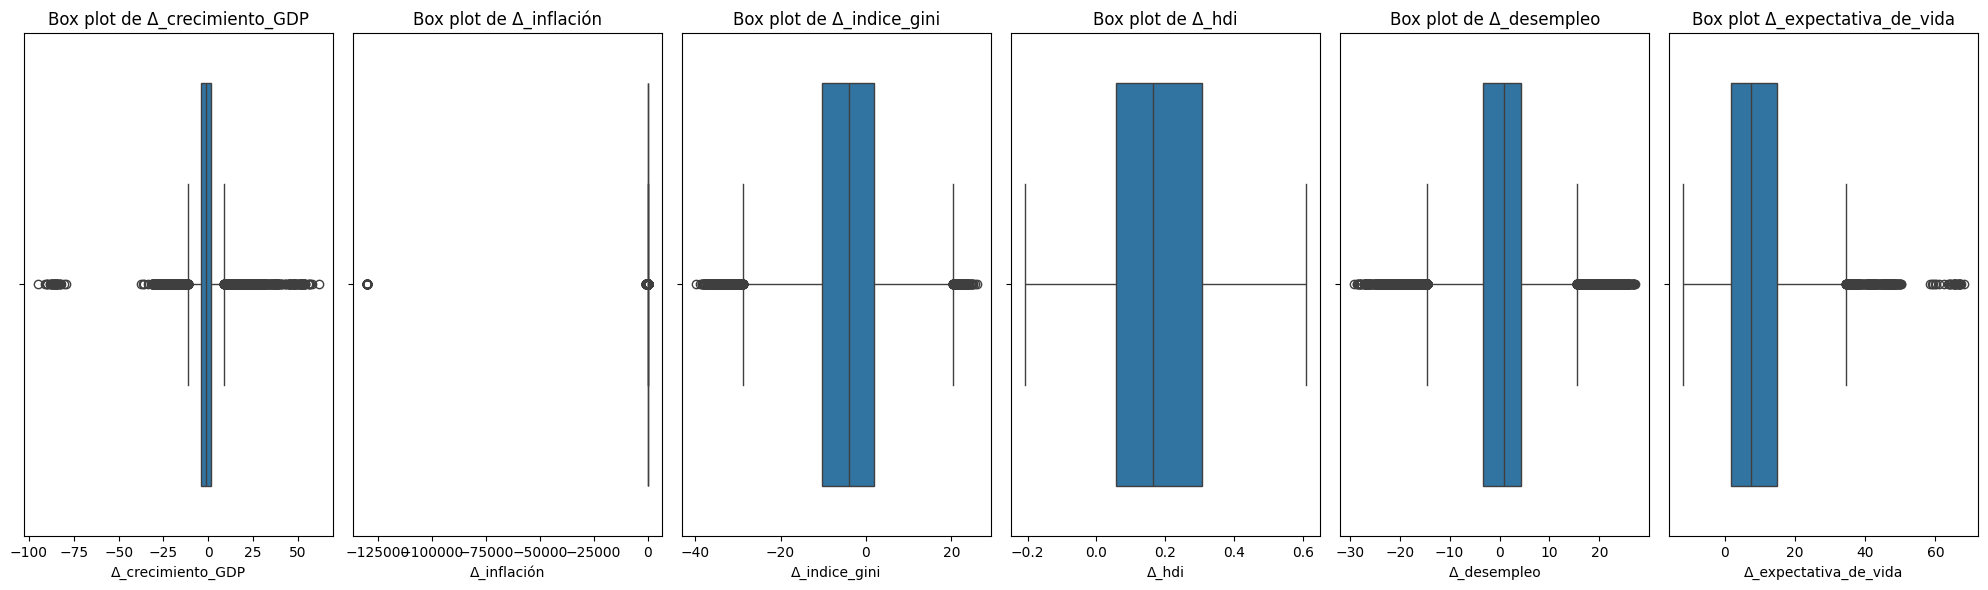

In [ ]:
#Primero haremos analisis de la distirbucion de algunas variables numericas

#importamos las bibliotecas para graficar
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#hacemos uso de subplots para ver los graficos lado a lado
ig, axes = plt.subplots(1, 6, figsize=(20, 6))  # (rows, columns)

#primero hacemos el boxplot de GDP
sns.boxplot(x='Δ_crecimiento_GDP', data=df_merged, ax=axes[0], )
axes[0].set_title("Box plot de Δ_crecimiento_GDP")

#luego procedemos a hacer el grafico para inflación
sns.boxplot(x='Δ_inflación', data=df_merged, ax=axes[1])
axes[1].set_title("Box plot de Δ_inflación")

#luego procedemos a hacer el grafico para GINI
sns.boxplot(x='Δ_indice_gini', data=df_merged, ax=axes[2])
axes[2].set_title("Box plot de Δ_indice_gini")

#luego procedemos a hacer el grafico para HDI
sns.boxplot(x='Δ_hdi', data=df_merged, ax=axes[3])
axes[3].set_title("Box plot de Δ_hdi")

#luego procedemos a hacer el grafico para Desempleo
sns.boxplot(x='Δ_desempleo', data=df_merged, ax=axes[4])
axes[4].set_title("Box plot de Δ_desempleo")

#luego procedemos a hacer el grafico para expectativa de vida
sns.boxplot(x='Δ_expectativa_de_vida', data=df_merged, ax=axes[5])
axes[5].set_title("Box plot Δ_expectativa_de_vida")

plt.tight_layout()
plt.show()

**Histograma**

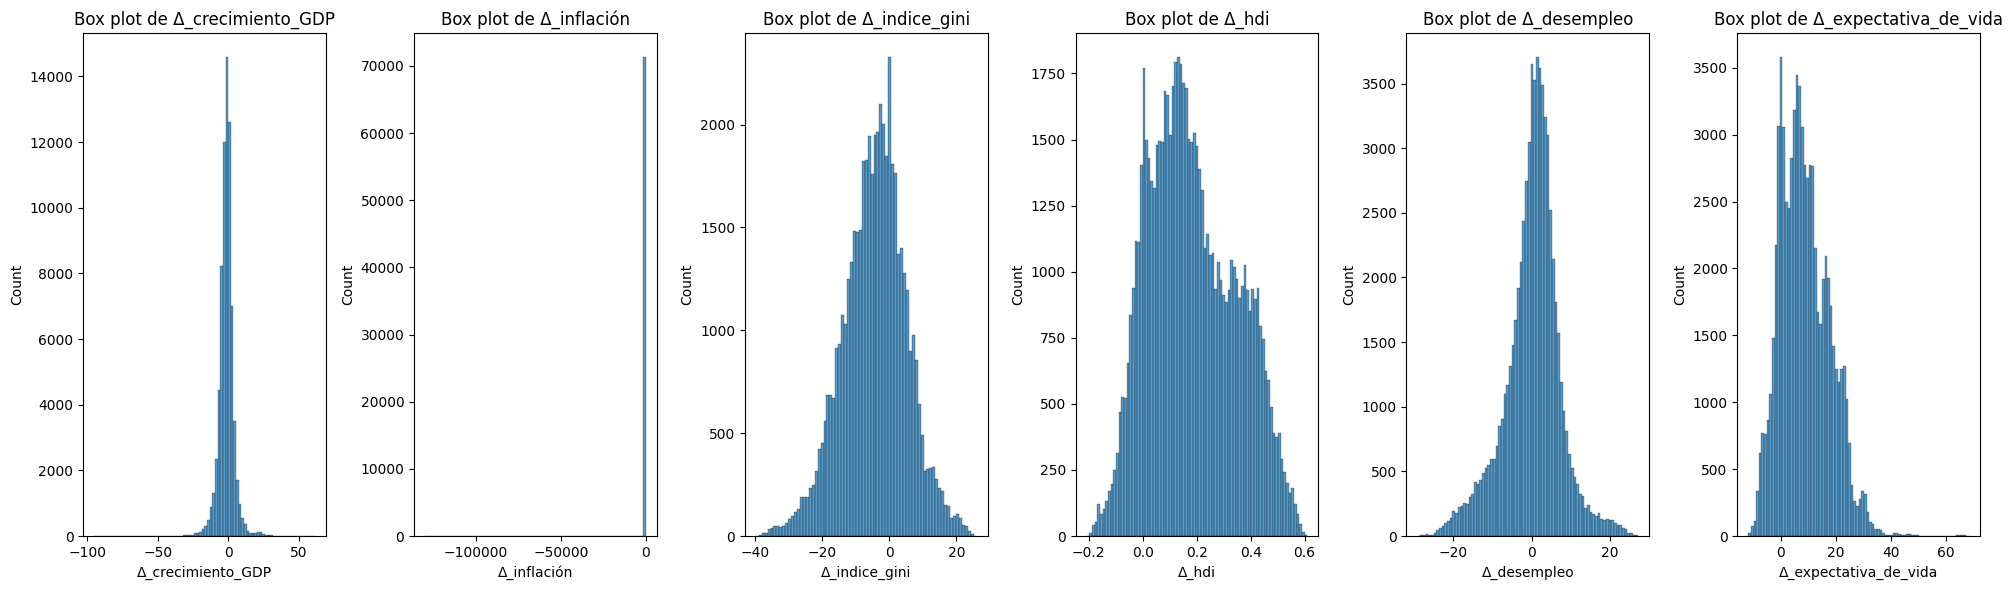

In [ ]:
# En todos los histogramas usamos el parametro rice para decidir la cantidad de bins

#hacemos uso de subplots para ver los graficos lado a lado
ig, axes = plt.subplots(1, 6, figsize=(20, 6))  # (rows, columns)

#histograma de GDP
sns.histplot(x='Δ_crecimiento_GDP', bins='rice' ,data=df_merged, ax=axes[0], )
axes[0].set_title("Box plot de Δ_crecimiento_GDP")

#histograma de inflación
sns.histplot(x='Δ_inflación', bins='rice' ,data=df_merged, ax=axes[1], )
axes[1].set_title("Box plot de Δ_inflación")

#histograma de GINI
sns.histplot(x='Δ_indice_gini', bins='rice' ,data=df_merged, ax=axes[2], )
axes[2].set_title("Box plot de Δ_indice_gini")

#histograma de HDI
sns.histplot(x='Δ_hdi', bins='rice' ,data=df_merged, ax=axes[3], )
axes[3].set_title("Box plot de Δ_hdi")

#histograma de Desempleo
sns.histplot(x='Δ_desempleo', bins='rice' ,data=df_merged, ax=axes[4], )
axes[4].set_title("Box plot de Δ_desempleo")

#histograma de Expectativa de vida
sns.histplot(x='Δ_expectativa_de_vida', bins='rice' ,data=df_merged, ax=axes[5], )
axes[5].set_title("Box plot de Δ_expectativa_de_vida")

plt.tight_layout()
plt.show()

## **2.4. Dateframe final**

In [ ]:
# Creamos un nuevo data set haciendo un merge del df original y el df merged que contiene los features preprocesados
df_final = df_merged.merge(
    df,
    on='ref_año',
    how='left',
    suffixes=('', '_ext')
)

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73511 entries, 0 to 73510
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ref_año                   73511 non-null  object 
 1   pais_origen               73511 non-null  object 
 2   pais_destino              73511 non-null  object 
 3   año                       73511 non-null  int64  
 4   Δ_crecimiento_GDP         73044 non-null  float64
 5   Δ_inflación               71408 non-null  float64
 6   Δ_indice_gini             51701 non-null  float64
 7   Δ_hdi                     71186 non-null  float64
 8   Δ_desempleo               68284 non-null  float64
 9   Δ_expectativa_de_vida     73511 non-null  float64
 10  total_general             73511 non-null  float64
 11  pais_origen_ext           73511 non-null  object 
 12  adquiere_nacionalidad     57149 non-null  float64
 13  busqueda_asilo            61414 non-null  float64
 14  migran

In [ ]:
# hacemos drop a las columnas innecesarias de df

# list comprenhension de las columnas que eliminaremos
columns_to_drop = [c for c in df_final.columns[10:] if c != 'total_general'] #las columnas 10 en adelante son todas de df original, donde solo queremos total general

#mostramos en pantalla las columnas a elminiar para chequear que no eliminemos erroneamente
for c in columns_to_drop:
    print(c)

pais_origen_ext
adquiere_nacionalidad
busqueda_asilo
migrantes_convencionales
salida_de_migrantes
migrantes_en_el_pais
pais_destino_ext
año_ext
crecimiento_GDP
crecimiento_GDP_2
inflación
inflación_2
indice_gini
indice_gini_2
hdi
hdi_2
desempleo
desempleo_2
expectativa_de_vida
expectativa_de_vida_2


### **2.5 Cambio de nombre de paises y eliminacion paises poco significantes**

In [ ]:
df_final = df_final.drop(columns=columns_to_drop)

In [ ]:
# Vamos a reemplazar algunos nombres de países de origen para que sean más significativos
replacements = {
    "China (Peopleâ€™s Republic of)": "China",
    "Palestinian Authority or West Bank and Gaza Strip": "Palestine",
    "CÃ´te dâ€™Ivoire": "Côte d'Ivoire",
    "Lao Peopleâ€™s Democratic Republic": "Laos",
    "Former Serbia and Montenegro": "Serbia and Montenegro",
    "Democratic Peopleâ€™s Republic of Korea": "North Korea",
    "TÃ¼rkiye": "Turkey",
    "Turks and Caicos Islands": "Turks and Caicos Islands"
}

# Aplicar reemplazos sobre la columna pais_origen
df_final['pais_origen'] = df_final['pais_origen'].replace(replacements)



In [ ]:
# Eliminar filas con 'EEA' o 'European Union (15 countries)' en la columna 'pais_origen'
df_final = df_final[~df_final['pais_origen'].isin(['EEA', 'European Union (15 countries)'])]


In [ ]:
replacements_destino = {
    "TÃ¼rkiye": "Turkey"
}

df_final['pais_destino'] = df_final['pais_destino'].replace(replacements_destino)


In [ ]:
df_final.head()

,ref_año,pais_origen,pais_destino,año,Δ_crecimiento_GDP,Δ_inflación,Δ_indice_gini,Δ_hdi,Δ_desempleo,Δ_expectativa_de_vida,total_general
0,DEU2015SYR2015,Syrian Arab Republic,Germany,2015,12.479839,-10.020320,-9.6,0.398,-3.600,15.598244,457138.0
1,DEU2016SYR2016,Syrian Arab Republic,Germany,2016,5.832511,-37.946717,-8.7,0.389,-3.907,17.376463,412073.0
2,COL2019VEN2019,Venezuela,Colombia,2019,22.264324,-130056.959431,5.7,0.028,1.894,3.938000,217039.0
3,COL2018VEN2018,Venezuela,Colombia,2018,17.059361,-858.285687,5.0,0.015,1.570,4.515000,204259.0
4,USA2016MEX2016,Mexico,United States,2016,0.243227,-2.602014,-7.7,0.155,0.967,4.259244,201422.0


## **2.6. Matriz de correlaciones**

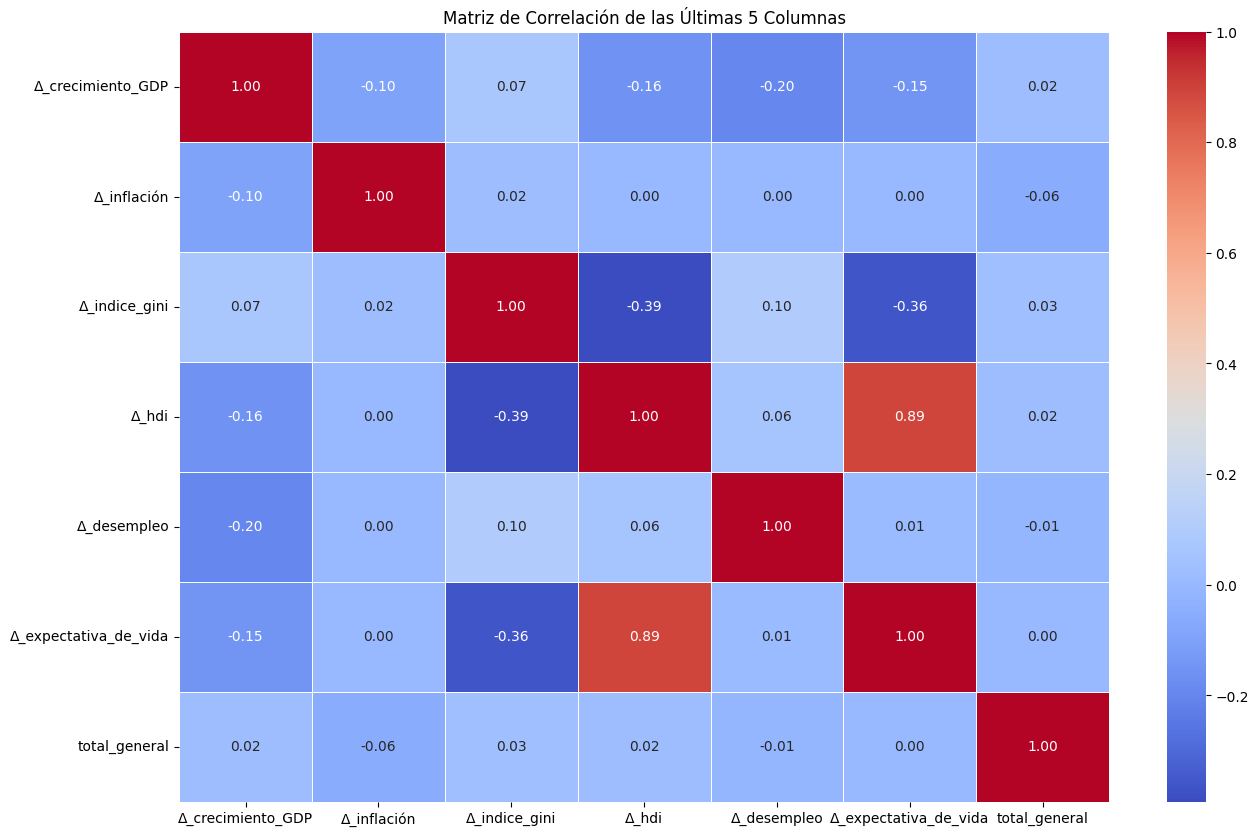

In [ ]:
numericas_df = df_final.iloc[:, -7:] # Tomamos la variables numericas unicamente

# 2. Calculate the correlation matrix *of* this DataFrame.
matrix = numericas_df.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación de las Últimas 5 Columnas")
plt.show()

Viendo los resultados de la matriz de correlacion, llegamos a la conclusion de que en general hay poca correlacion entre las variables y con el total general, el cual sera nuestro target.

Sin embargo, hay unas excepciones entendibles. Expectativa de vida tiene alta correlacion con HDI. Esto se debe a que este indicador es un componente importante del HDI y por ende no son independientes. Con el caso GINI pasa algo similar y tiene correlacion negativa moderada con HDI y expecativa de vida por las mismas razones. Tenemos que recordar que un indice GINI menor significa menor desigualdad.

Creeemos que debido de la alta correlacion de estas variables, lo mejor para el modelo es prescindir de HDI, la cual es la que presenta mayores niveles de correlacion con otras variables

In [ ]:
# Hacemos drop de la columna HDI
df_final = df_final.drop(columns='Δ_hdi')

In [ ]:
df_final.head()

,ref_año,pais_origen,pais_destino,año,Δ_crecimiento_GDP,Δ_inflación,Δ_indice_gini,Δ_desempleo,Δ_expectativa_de_vida,total_general
0,DEU2015SYR2015,Syrian Arab Republic,Germany,2015,12.479839,-10.020320,-9.6,-3.600,15.598244,457138.0
1,DEU2016SYR2016,Syrian Arab Republic,Germany,2016,5.832511,-37.946717,-8.7,-3.907,17.376463,412073.0
2,COL2019VEN2019,Venezuela,Colombia,2019,22.264324,-130056.959431,5.7,1.894,3.938000,217039.0
3,COL2018VEN2018,Venezuela,Colombia,2018,17.059361,-858.285687,5.0,1.570,4.515000,204259.0
4,USA2016MEX2016,Mexico,United States,2016,0.243227,-2.602014,-7.7,0.967,4.259244,201422.0


# **3. Modelos de Machine Learning**

En nuestro proceso, experimentaremos con tres modelos distintos para ir evaluando cual es el mas efectivo y eficiente en tiempo para hacer predicciones sobre el total general

Los siguientes son los modelos que utlizamos:


1.   Linear Regresion
2.   Random Forest Regressor
3. CatBoost (Un tipo de Gradient Boost Regressor)



In [ ]:
# Librerias necesarias
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
import sklearn.metrics as sklearn
from sklearn.model_selection import cross_val_score, KFold

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.1 MB/s eta 0:00:00


## **3.1. Train/ Test split**

In [ ]:
# Primero ordenamos la data por orden chronologico
df_sorted = df_final.sort_values(by='año')

# Definimos el año limite que determinara la muestra de train
cutoff = 2017

In [ ]:
df_sorted = df_sorted.drop(columns='ref_año')

## **3.2. Pipeline de preprocessing**

### **3.2.1. Pipeline Modelos 1**

El modelo de Random Forest Regressor no puede tratar los valores nulos (NaN) de manera nativa, por lo que el pipeline tiene que incluir un Imputer para poder tratar estos valores y posteriormente correr el modelo

In [ ]:
# Para los modelos que no aceptan los NAN
#hacemos una separacion de features ya que las numericas y las categoricas tienen tratamiento distinto
numeric_features = list(df_final.columns[4:9]) # Excluimos año, pero mantenmos los indicadores macroeconomicos
categorical_features = ['pais_origen', 'pais_destino'] # Solo los paises son categoricas
# Al final se juntan ambos features cuando llegue el momento de entrenar el modelo y ya esten preprocesadas las features
features = categorical_features + numeric_features
# definimos el target del modelo que es la cantidad de migrantes entre pais de origen y destino
target = 'total_general'

# Preprocesadores
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# ColumnTransformer que aplica transformaciones según tipo de columna
preprocessor_1 = ColumnTransformer([
    ('num', num_pipeline, numeric_features),
    ('cat', cat_pipeline, categorical_features)
])

df_train =  df_sorted[df_sorted['año'] <= cutoff]
df_test = df_sorted[df_sorted['año'] > cutoff]

X_train = df_train[features]
y_train = df_train[target]
X_test = df_test[features]
y_test = df_test[target]

In [ ]:
df_train.head()

,pais_origen,pais_destino,año,Δ_crecimiento_GDP,Δ_inflación,Δ_indice_gini,Δ_desempleo,Δ_expectativa_de_vida,total_general
6849,Ukraine,France,2010,12.311916,-15.793572,7.4,-0.104,12.255634,821.0
6846,China,Chile,2010,-10.516763,1.081210,NaN,6.593,3.573000,822.0
6843,Greece,Netherlands,2010,0.453986,-0.020296,-5.7,-5.269,0.360976,822.0
69818,Andorra,Finland,2010,-2.773184,-1.000001,NaN,NaN,-4.380488,0.0
6876,Singapore,Canada,2010,-3.043040,-0.297253,NaN,2.484,-0.175366,814.0


### **3.2.2 Pipeline Modelo 2**

In [ ]:
from catboost import CatBoostRegressor

# Preprocesadores
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()) #aplicamos estandarizacion a las variables numericas
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore')) # One hot Encoder para las categoricas ya que no son ordinales
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ], remainder='passthrough') #esto permite mantener el año tal cual como esta

model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', CatBoostRegressor())
])


## **3.3.Random Forest Regressor**

In [ ]:
# Pipeline completo con modelo
model_imputer = Pipeline([
    ('preprocessing', preprocessor_1),
    ('model', RandomForestRegressor())
])

model_imputer.fit(X_train, y_train)



Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Δ_crecimiento_GDP',
                                                   'Δ_inflación',
                                                   'Δ_indice_gini',
                                                   'Δ_desempleo',
                                                   'Δ_expectativa_de_vida']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['pais_origen',
                                                   'pais_destino'])])),
                ('model', RandomForestRegressor())])

In [ ]:
y_pred = model_imputer.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error Test: \t{test_mse}")

y_pred_train = model_imputer.predict(X_train)
train_mse = mean_squared_error(y_train, y_pred_train)
print(f"Mean Squared Error Train: \t{train_mse}")

Mean Squared Error Test: 	15377448.746188639
Mean Squared Error Train: 	1478825.0343891045


In [ ]:
from sklearn.metrics import r2_score
y_test_pred = model_imputer.predict(X_test)

# Compute R^2 on test data
r2_test = r2_score(y_test, y_test_pred)
print(f"Test R^2: {r2_test:.4f}")

Test R^2: 0.5083


In [ ]:
from sklearn.metrics import mean_absolute_error

# Predictions (assuming model has already been fitted)
y_pred_test = model_imputer.predict(X_test)
y_pred_train_2 = model_imputer.predict(X_train)

# Calculate MAE
test_mae = mean_absolute_error(y_test, y_pred_test)
train_mae = mean_absolute_error(y_train, y_pred_train)

print(f"Mean Absolute Error Test: \t{test_mae}")
print(f"Mean Absolute Error Train: \t{train_mae}")


Mean Absolute Error Test: 	501.79769882441866
Mean Absolute Error Train: 	105.32052075179942


## **3.4. CatBoost + RandomSearchCV**

Despues de hacer unas pruebas con CatBoost, nos dimos cuenta que era considerablemente mas rapido que el Random Forest Regressor y permite mantener los NaNs sin necesidad de aplicar un Imputer, lo que permite mantener data mas fiel a la realidad

Como CatBoost es un modelo iterativo basado en Gradient Boost Regression, Hay varios hyperparametros que se pueden afinar. Para esto aplicamos el RandomSearch con tres hyperparametros con 3 valores cada uno.

In [ ]:
# En este caso necesitamos hacer 3 splits uno de train uno de validacion y otro de test, asi evitamos que el modelo tenga acceso a la data de prueba mientras hace las iteraciones
train_cutoff = 2016
val_cutoff = 2017

df_train = df_sorted[df_sorted['año'] <= train_cutoff]
df_val = df_sorted[(df_sorted['año'] > train_cutoff) & (df_sorted['año'] <= val_cutoff)]
##df_test = df_sorted[df_sorted['año'] > val_cutoff]

X_train = df_train[features]
y_train = df_train[target]
X_val = df_val[features]
y_val = df_val[target]


X_trainval = pd.concat([X_train, X_val])
y_trainval = pd.concat([y_train, y_val])

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit

param_distributions = {
    'classifier__depth': [4,6],
    'classifier__learning_rate': [0.1, 0.05, 0.03],
    'classifier__iterations': [1000, 2000, 5000]
}

tscv = TimeSeriesSplit(n_splits=3)

random_search = RandomizedSearchCV(
    model,
    param_distributions=param_distributions,
    n_iter=10,
    scoring='neg_mean_squared_error',
    cv=tscv,
    verbose=2,
    n_jobs=-1
)

random_search.fit(X_trainval, y_trainval)

Se han truncado las últimas 5000 líneas del flujo de salida.
0:	learn: 4824.7704283	total: 52.8ms	remaining: 4m 23s
1:	learn: 4701.2731806	total: 58.1ms	remaining: 2m 25s
2:	learn: 4626.1818710	total: 63.3ms	remaining: 1m 45s
3:	learn: 4526.4416264	total: 68.5ms	remaining: 1m 25s
4:	learn: 4466.4892275	total: 73.7ms	remaining: 1m 13s
5:	learn: 4414.1252885	total: 79.1ms	remaining: 1m 5s
6:	learn: 4366.9989544	total: 84ms	remaining: 59.9s
7:	learn: 4276.7216467	total: 89.2ms	remaining: 55.7s
8:	learn: 4241.1323706	total: 94.1ms	remaining: 52.2s
9:	learn: 4207.1053055	total: 99.2ms	remaining: 49.5s
10:	learn: 4142.3684762	total: 105ms	remaining: 47.5s
11:	learn: 4114.1346428	total: 110ms	remaining: 45.6s
12:	learn: 4053.1322944	total: 115ms	remaining: 44.1s
13:	learn: 3996.4487987	total: 120ms	remaining: 42.8s
14:	learn: 3966.6022948	total: 125ms	remaining: 41.6s
15:	learn: 3910.5277906	total: 131ms	remaining: 40.7s
16:	learn: 3865.3173593	total: 138ms	remaining: 40.6s
17:	learn: 3842.62

RandomizedSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=3, test_size=None),
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('num',
                                                                               Pipeline(steps=[('scaler',
                                                                                                StandardScaler())]),
                                                                               ['Δ_crecimiento_GDP',
                                                                                'Δ_inflación',
                                                                                'Δ_indice_gini',
                                                                                'Δ_desempleo',
                                                                                'Δ_expectativa_de_vida']),
                                                                              ('cat',
                                                                               Pipeline(steps=[('onehot',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['pais_origen',
                                                                                'pais_destino'])])),
                                             ('classifier',
                                              <catboost.core.CatBoostRegressor object at 0x79323d8a3910>)]),
                   n_jobs=-1,
                   param_distributions={'classifier__depth': [4, 6],
                                        'classifier__iterations': [1000, 2000,
                                                                   5000],
                                        'classifier__learning_rate': [0.1, 0.05,
                                                                      0.03]},
                   scoring='neg_mean_squared_error', verbose=2)

In [ ]:
print("Best params:", random_search.best_params_)
print("Best score (neg MSE):", random_search.best_score_)


Best params: {'classifier__learning_rate': 0.1, 'classifier__iterations': 5000, 'classifier__depth': 6}
Best score (neg MSE): -14737820.15207523


In [ ]:
best_model = random_search.best_estimator_
y_pred_test = best_model.predict(X_test)

y_trainval_pred = best_model.predict(X_trainval)
cb_mse_train = mean_squared_error(y_trainval, y_trainval_pred)

cb_mse_test = mean_squared_error(y_test, y_pred_test)

print("Final Train MSE:", cb_mse_train)
print("Final Test MSE:", cb_mse_test)

Final Train MSE: 427936.65424072783
Final Test MSE: 10571504.585490922


In [ ]:
from sklearn.metrics import mean_absolute_error

# Predict on train and test sets
y_pred_train_cb = best_model.predict(X_trainval)
y_pred_test_cb = best_model.predict(X_test)

# Calculate MAE
train_mae_cb = mean_absolute_error(y_trainval, y_pred_train_cb)
test_mae_cb = mean_absolute_error(y_test, y_pred_test_cb)

# Print results
print(f"CatBoost - Mean Absolute Error (Train): \t{train_mae_cb:.2f}")
print(f"CatBoost - Mean Absolute Error (Test): \t{test_mae_cb:.2f}")

CatBoost - Mean Absolute Error (Train): 	208.55
CatBoost - Mean Absolute Error (Test): 	545.46


In [ ]:
from sklearn.metrics import r2_score

# Predictions on validation set (optional if you split manually)
y_val_pred = random_search.predict(X_val)
r2_val = r2_score(y_val, y_val_pred)
print("Validation R²:", r2_val)

Validation R²: 0.9869345428438876


In [ ]:
y_test_pred = random_search.best_estimator_.predict(X_test)
r2_test = r2_score(y_test, y_test_pred)
print("Test R²:", r2_test)

Test R²: 0.6619702436850488


# **4. Evaluacion y comparacion de resultados**

En esta etapa compilamos los resultados de los tres modelos para hacer la comparacion y decidir cual es el mejor

Basandonos en esto, profundizaremos en el analisis de los resultados del mejor modelo

In [ ]:
import pandas as pd

# Manualmente hacemos el input de los resultados y creamos un datafram para verlos de manera tabular
data = {
    "Model": ["Randon Forest Regressor", "CatBoost"],
    "Test MSE": [15377448.7462, 10571504.5855],
    "Train MSE": [1478825.0344, 427936.6542],
    "Test R^2": [0.51, 0.66]
}

df_metrics = pd.DataFrame(data)
print(df_metrics.to_markdown())

|    | Model                   |    Test MSE |        Train MSE |   Test R^2 |
|---:|:------------------------|------------:|-----------------:|-----------:|
|  0 | Randon Forest Regressor | 1.53774e+07 |      1.47883e+06 |       0.51 |
|  1 | CatBoost                | 1.05715e+07 | 427937           |       0.66 |


En cuanto los resultados de MSE ambos muestran cierto nivel de overfitting aunque parece ser un nivel tolerable, pero llama la atencion la amplia diferencia de R^2 entre los modelos, con el CatBoost siendo mucho mejor explicando la variabilidad. A continuacion haremos una representacion visual de estos ressultado y el gap entre train y test en ambos modelos para tomar la decision final

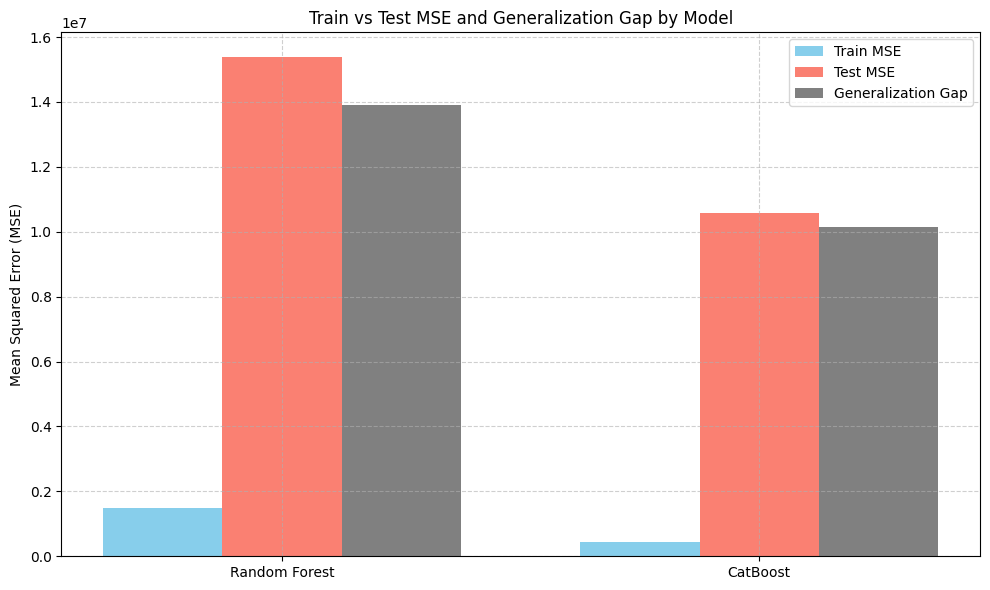

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Replace these values with your actual results if needed
iterations = ["Random Forest", "CatBoost"]

train_mse = [1478825.0344, 427936.6542]   # Example: replace with your real training MSEs
test_mse = [15377448.7462, 10571504.5855]   # Example: replace with your real test MSEs

# Calculate generalization gap (test - train)
gap = np.array(test_mse) - np.array(train_mse)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.25
x = np.arange(len(iterations))

ax.bar(x - bar_width, train_mse, width=bar_width, label='Train MSE', color='skyblue')
ax.bar(x, test_mse, width=bar_width, label='Test MSE', color='salmon')
ax.bar(x + bar_width, gap, width=bar_width, label='Generalization Gap', color='gray')

ax.set_ylabel("Mean Squared Error (MSE)")
ax.set_title("Train vs Test MSE and Generalization Gap by Model")
ax.set_xticks(x)
ax.set_xticklabels(iterations)
ax.legend()
ax.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

En la representacion visual queda claro que el mejor modelo es el CatBoost en todas las metricas. CatBoost obtuvo mucho mejores resultados en terminos de MSE tanto para test como para train, como tambien tiene un gap menor que el visto en el Random Forest.

Si le agregamos a esto, que el R^2 del CatBoost es mas alto y le toma significantemente menos tiempo de entrenar, queda claro que es el mejor modelo para predecir el total general y para seguir modificando de ser necesario

## **4.1. Evaluaciones finales de modelo final (CatBoost)**

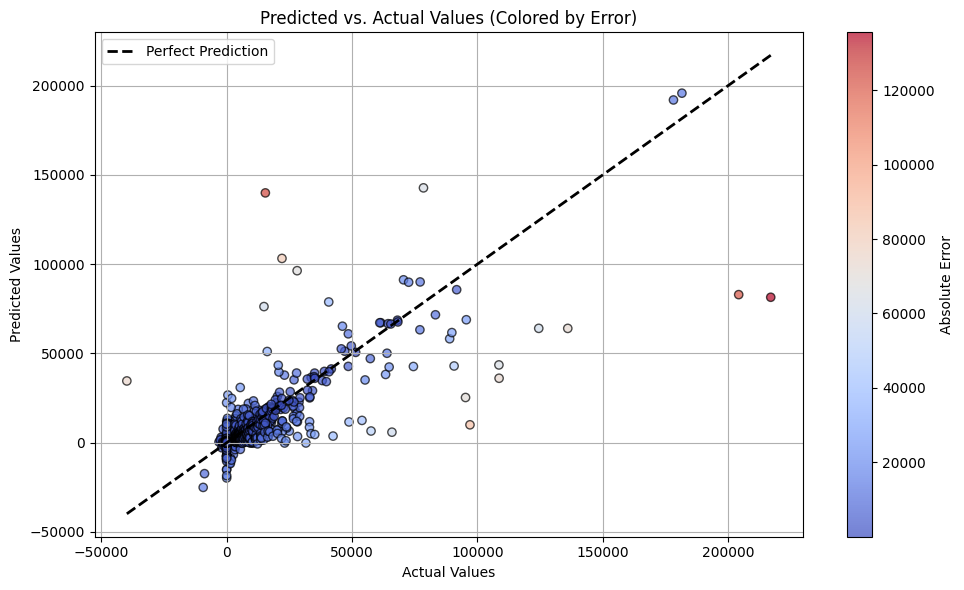

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Predict on test set
y_pred_test = best_model.predict(X_test)

# Compute absolute error for color
errors = np.abs(y_test - y_pred_test)

# Create DataFrame for easy plotting
df_plot = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_test,
    'Error': errors
})

# Plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_plot['Actual'], df_plot['Predicted'],
                      c=df_plot['Error'], cmap='coolwarm', alpha=0.7, edgecolor='k')

plt.plot([df_plot['Actual'].min(), df_plot['Actual'].max()],
         [df_plot['Actual'].min(), df_plot['Actual'].max()],
         'k--', lw=2, label='Perfect Prediction')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values (Colored by Error)')
plt.colorbar(scatter, label='Absolute Error')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

En este grafico se puede apreciar como la mayoria de las predicciones muestran un error relativamente bajo hastael rango de valores netos de migracion de 50,000 o menor, a pesar de haber presencia leve de grandes residuos. Por arriba de ese valor se puede ver como el error absoluto va aumentando.

Pareciera que la hay una cantidad similar de residuos positivos como negativos, basandonos en este grafico (la cantidad de puntos por arriba y debajo de la diagonal parecen ser equitativos)

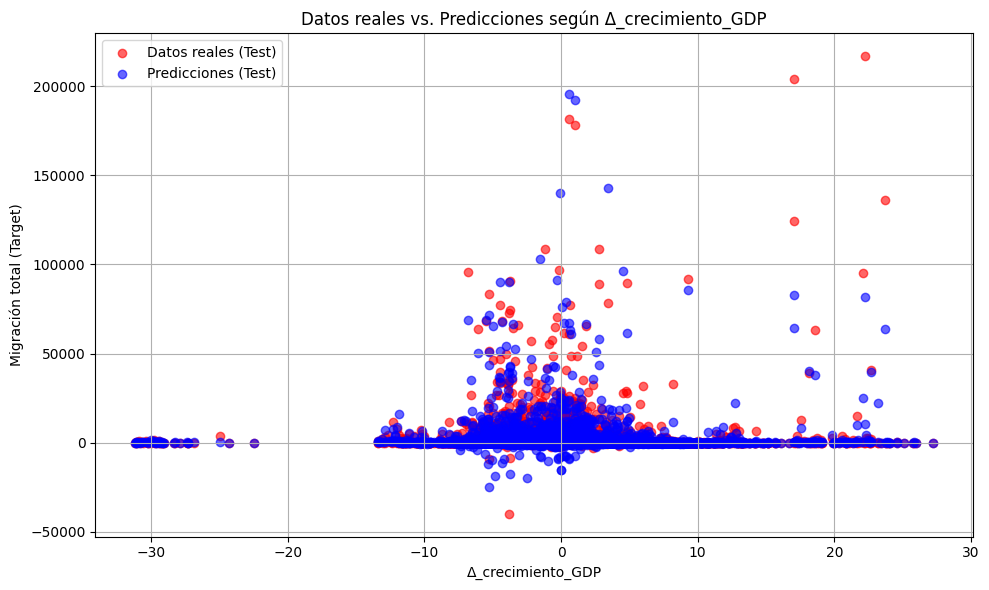

In [ ]:
import matplotlib.pyplot as plt

# Feature to analyze
feature = 'Δ_crecimiento_GDP'

# Get the feature values from the test set
X_feature_test = X_test[feature]

# Predict using the final model
y_test_pred = best_model.predict(X_test)

plt.figure(figsize=(10, 6))

# Plot real values
plt.scatter(X_feature_test, y_test,
            color='red', label='Datos reales (Test)', alpha=0.6)

# Plot predicted values
plt.scatter(X_feature_test, y_test_pred,
            color='blue', label='Predicciones (Test)', alpha=0.6)

plt.title(f'Datos reales vs. Predicciones según {feature}')
plt.xlabel(feature)
plt.ylabel('Migración total (Target)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Emabos graficos podemos ver que el modelo hizo un buen trabajo ne generalizar en la mayoria de los datos, por lo menos hasta valores hasta aprox 50,000 - 70,000. Sin embargo, mientras mas extemos los valores mas le cuesta hacer predicciones correcrtas, con errores tanto a la baja como al alsa.

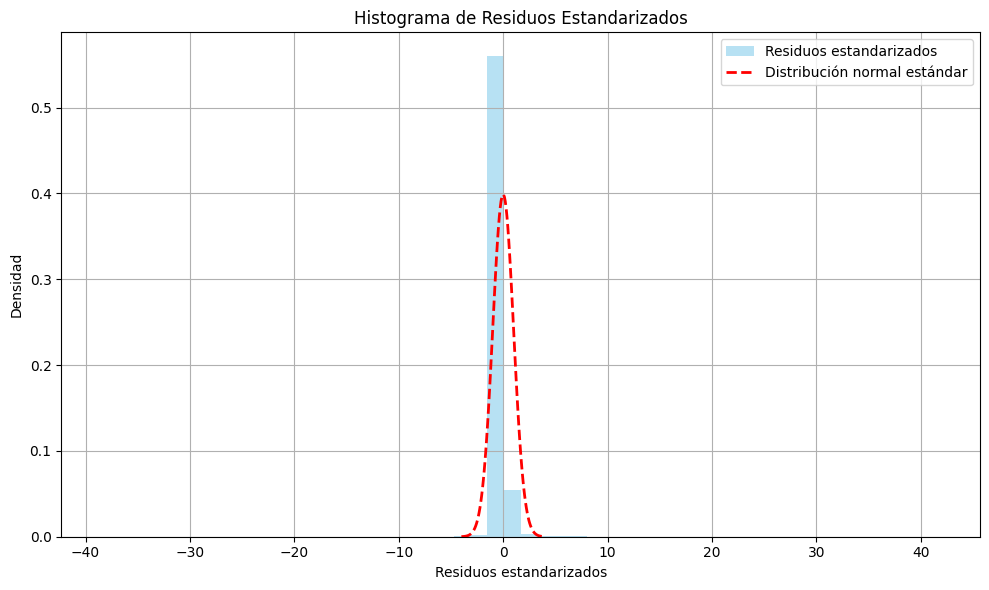

In [ ]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np

# Predict using the best model
y_test_pred = best_model.predict(X_test)

# 1. Calculate residuals
residuals = y_test - y_test_pred

# 2. Standardize residuals
standardized_residuals = (residuals - np.mean(residuals)) / np.std(residuals)

# 3. Plot histogram with standard normal overlay
plt.figure(figsize=(10, 6))
plt.hist(standardized_residuals, bins='rice', density=True, alpha=0.6, color='skyblue', label='Residuos estandarizados')

# Overlay a standard normal distribution curve
x = np.linspace(-4, 4, 100)
plt.plot(x, norm.pdf(x, 0, 1), 'r--', linewidth=2, label='Distribución normal estándar')

# Labels and styling
plt.title('Histograma de Residuos Estandarizados')
plt.xlabel('Residuos estandarizados')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Por lo general, la mayoria de los residuos estandarizados se encuentran cercanos a 0 aunque ligeramente hacia la izquierda. Esto puede signifciar que el modelo tiene una leve tendencia a subestimar predicciones para ciertos valores

Pareciera que hay una distribucion normal con alta concetracion alrededor de la media y baja desviacion estandar. Sin emabargo, creemos que hay pocos outlies con valores muy extremos que no se pueden apreciar en este grafico debido al cluster principal de los residuos. Considerando esto, decidios hacer mas estudios sobre estos residuos estandarizados para entender su distirbucion  

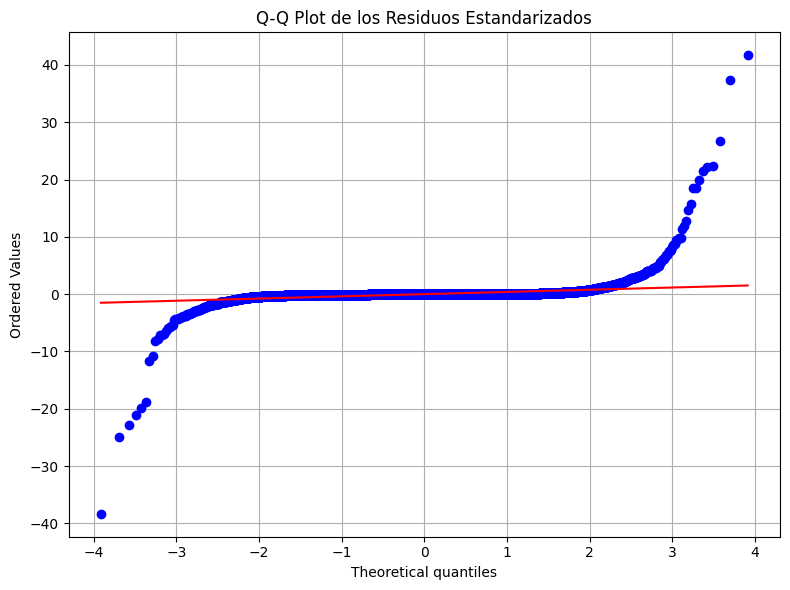

In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Q-Q Plot
plt.figure(figsize=(8, 6))
stats.probplot(standardized_residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot de los Residuos Estandarizados")
plt.grid(True)
plt.tight_layout()
plt.show()

El Q-Q Plot nos da mas indicios que hay altos niveles de Kurtosis, o en otra palabras, que las colas de esta distribucion son muy pesadas. Este grafico en combinacion con el anterior, nos llevana a la conclusion de que los residuos estandar siguen una distribucion leptocúrtico la cual essta caracterizado por tener un pico alto y colas muy pesadas

muestra que el modelo en general es bueno prediciendo la mayoria de los valores, pero le cuesta hacer predicciones de valores extremos tanto negativos como positivos.

Estos grandes residuos indican que hay pocos outliers pero de gran peso que afectan la capacida de prediccion del modelo, casuanso que el error sea mas grande

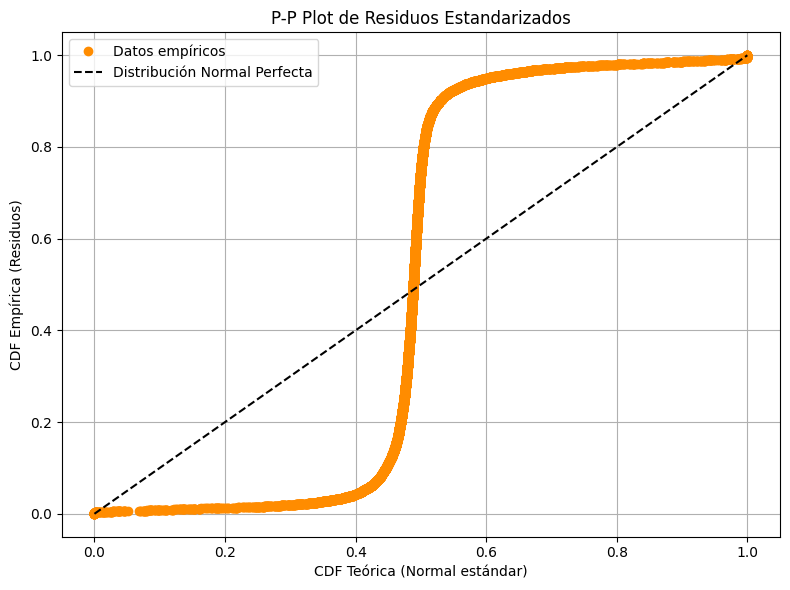

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Sort standardized residuals
sorted_resid = np.sort(standardized_residuals)

# Compute empirical CDF values
empirical_cdf = np.arange(1, len(sorted_resid) + 1) / len(sorted_resid)

# Compute theoretical CDF from standard normal
theoretical_cdf = norm.cdf(sorted_resid)

# Plot P-P plot
plt.figure(figsize=(8, 6))
plt.plot(theoretical_cdf, empirical_cdf, marker='o', linestyle='', color='darkorange', label='Datos empíricos')
plt.plot([0, 1], [0, 1], 'k--', label='Distribución Normal Perfecta')

plt.title("P-P Plot de Residuos Estandarizados")
plt.xlabel("CDF Teórica (Normal estándar)")
plt.ylabel("CDF Empírica (Residuos)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

La linea de datos empirico tiene una forma de S, otra indicacion de que no hay normalidad en los residuos

La conclusion final sobre los residuos es que no siguen una distribucion normal. la mayoria se encuentran cercanos a 0, lo que indica que el modelo es bueno prediciendo en la mayor parte, pero la existencia de pocos pero grandes resiudos indica que el modelo le cuesta predecir correctamente valores mas extremos y por ende no esta captando todos los patrones necesarios

## **5. Conclusiones finales y recomendaciones**

## **5.1 Conclusiones**


Los dos grandndes logros han sido los siguientes:



1.   *Base de datos migratoria:* se logro crear una base de datos de flujos migratorios e indicadores economicos por pais con mas de 77,000 registros. EL objetivo que tenemos en mente es que cualquier investigador, estudiante o persona intereseada pueda utilizar estos datos para analisis independientes a este informe  

2.   *Modelo base de prediccion de flujos migratorios:* Se logro crear un modelo de regresion de Machine Learning (ML) con R^2 de 0.66 para la prediccion de flujos migratorios con base en diferentes indicadores economicos. El modelo es bueno generalizando en su mayor parte, pero falla mas a la hora de predecir valores extremos. Esto en parte creemos que ocurre porque los outliers son pocos pero muy extremos. Adicionalmente, varios de estos outliers esatban en set de test, por lo cual el modelo los estaba viendo por primera vez y sin entrenamiento previo. Con el resultado actual creemos que el modelo ayuda a entender factores que generan presiones migratorias, pero para poder utilizar esta herramienta para implementar presupuesto o regulacion, es necesario mejerorar la capacidad de prediccion

El estudio de flujos migratorio es muy complejo por naturaleza y probablemnet impredecible en gran parte. Valores corresponden a comportamiento humano, el cual en parte esta dirigido por factores logicos, pero que finalmente tienen un componente estocastico. Considerando eso, creemos que los resultados han sido satisfactorios y con psoibilidad de mejora, lo que puede llevar a esta herramienta a ayudar a gobiernos en la toma de decisiones y en la mejora de la calidad de vida de la poblacion nacional y extranjera  



## **5.2 Recomendaciones**

Por limitante de tiempo y datos, hay ciertos ajustes que no se pudieron implementar, pero que creemos que valen la pena explorar par mejorar el modelo de prediccion o el valor de la data encontrada

**Modelo de predicciones**



*   Quantile regression
*   Normalizacion vs Standarizacion
* Redes neuronales
* mas indicadores (inseguridad, coordenadas de paises, tratados entre paises, indice de criminalidad, indice de corrupcion, etc...)
* mayor tratamiento de outliers en features (inlflacion en particular)
* Tuning de hiperparametros mas robusta (opcionde intentar con un Grid Search y mas opciones de hiperparametros)
*




**Recomendaciones Generales**


*   Crear un interfaz para interactuar con el mddelo y ver resultados filtrados
*   Creacion de un dashboard de la data original para generacion de insights sobre paises
* Expandir sobre la base de este modelo de machine learning
* tomar estas predicciones y resultados como un input para analisis, pero no depender netamente de el
* Hacer mas evaluaciones de desempeno

